# Quote-specific dataset

In [38]:
import pandas as pd

# Load data
data = pd.read_pickle('/usr2/mamille2/fanfiction-project/data/features/relationship_prediction_assertion_sample5400.pkl')
print(data.shape)
print(data.columns)

pairings = data['pairing'].unique()

(5400, 29)
Index(['fic_id', 'pairing', 'pairing_embedding_unigrams_assertions_local_5',
       'pairing_embedding_unigrams_assertions_local_10',
       'pairing_embedding_unigrams_assertions_local_25',
       'pairing_embedding_unigrams_assertions_local_50', 'relationship',
       'selected_relationships', 'is_romantic', 'is_canon', 'is_mm',
       'shape_10', 'pairing_embedding_embs_background_10',
       'pairing_embedding_embs_adapted_10',
       'pairing_embedding_unigrams_quotes', 'pairing_embedding_embs_combined',
       'pairing_embedding_canon_embs_background', 'dist_canon_combined',
       'subtraction_canon_combined', 'pairing_embedding_canon_embs_bg',
       'dist_canon_bg', 'subtraction_canon_bg',
       'pairing_embedding_canon_embs_combined',
       'pairing_embedding_embs_aligned',
       'pairing_embedding_canon_embs_aligned', 'dist_canon_aligned',
       'subtraction_canon_aligned', 'pairing_embedding_embs_background_quotes',
       'pairing_embedding_embs_combined_quo

In [39]:
# Filter to instances where quotes not 0s

filtered = data[data['pairing_embedding_embs_combined_quotes'].map(lambda x: not all(el==0 for el in x))]
len(filtered)

3685

In [40]:
data = filtered

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# train, test = train_test_split(data, test_size=0.1, random_state=9)
train_ids, test_ids = train_test_split(data['fic_id'].unique(), test_size=0.1, random_state=11)
# train_ids, test_ids = train_test_split(data['fic_id'].unique(), test_size=0.1, random_state=9)

train = data[data['fic_id'].isin(train_ids)]
test = data[data['fic_id'].isin(test_ids)]
print(len(train))
print(len(train)/ len(data))
print(train.columns)
print(sum(train['is_romantic']/len(train)))
print(sum(train['is_canon']/len(train)))
print(sum(train['is_mm']/len(train)))

3305
0.8968792401628223
Index(['fic_id', 'pairing', 'pairing_embedding_unigrams_assertions_local_5',
       'pairing_embedding_unigrams_assertions_local_10',
       'pairing_embedding_unigrams_assertions_local_25',
       'pairing_embedding_unigrams_assertions_local_50', 'relationship',
       'selected_relationships', 'is_romantic', 'is_canon', 'is_mm',
       'shape_10', 'pairing_embedding_embs_background_10',
       'pairing_embedding_embs_adapted_10',
       'pairing_embedding_unigrams_quotes', 'pairing_embedding_embs_combined',
       'pairing_embedding_canon_embs_background', 'dist_canon_combined',
       'subtraction_canon_combined', 'pairing_embedding_canon_embs_bg',
       'dist_canon_bg', 'subtraction_canon_bg',
       'pairing_embedding_canon_embs_combined',
       'pairing_embedding_embs_aligned',
       'pairing_embedding_canon_embs_aligned', 'dist_canon_aligned',
       'subtraction_canon_aligned', 'pairing_embedding_embs_background_quotes',
       'pairing_embedding_embs

In [46]:
import numpy as np
import scipy.sparse

X_train, y_train = {}, {}
X_test, y_test = {}, {}

add_features = True

# for feature_set in ['unigrams', 'embs']:
# for feature_set in ['unigrams_assertions_local_10', 'embs_adapted_10', 'embs_background_10']:
# for feature_set in ['unigrams_quotes', 'unigrams_assertions_local_10']:
# for feature_set in pairing_char_embs_fpath:
# for feature_set in ['embs_combined', 'dist_canon_combined']:
# for feature_set in ['embs_combined', 'subtraction_canon_combined']:
# for feature_set in ['embs_background_10', 'dist_canon_bg']:
# for feature_set in ['embs_background_10', 'subtraction_canon_bg']:
# for feature_set in ['embs_combined', 'dist_canon_aligned']:
# for feature_set in ['embs_combined', 'subtraction_canon_aligned']:
# for feature_set in ['embs_combined', 'embs_combined_quotes']:
# for feature_set in ['embs_background_10', 'embs_background_quotes', 'subtraction_canon_bg']:
# for feature_set in ['embs_combined_quotes']:
# for feature_set in ['embs_combined', 'embs_combined_quotes']:
# for feature_set in ['embs_combined_quotes', 'subtraction_canon_combined']:
for feature_set in ['embs_background_quotes', 'subtraction_canon_bg']:

    if feature_set.startswith('embs'):
        X_train[feature_set] = np.vstack(train[f'pairing_embedding_{feature_set}'].tolist())
        X_test[feature_set] = np.vstack(test[f'pairing_embedding_{feature_set}'].tolist())
        
    elif 'canon' in feature_set:
        X_train[feature_set] = np.vstack(train[feature_set].tolist())
        X_test[feature_set] = np.vstack(test[feature_set].tolist())
        
    elif feature_set.startswith('unigrams'):
        X_train[feature_set] = scipy.sparse.vstack(train[f'pairing_embedding_{feature_set}'].tolist())
        X_test[feature_set] = scipy.sparse.vstack(test[f'pairing_embedding_{feature_set}'].tolist())
        
    elif feature_set == 'unigrams+embs':
        unigram_features = scipy.sparse.vstack(train[f'pairing_embedding_unigrams'].tolist())
        emb_features = np.array(train[f'pairing_embedding_embs'].tolist())
        X_train[feature_set] = scipy.sparse.hstack([unigram_features, emb_features])
        
        unigram_features = scipy.sparse.vstack(test[f'pairing_embedding_unigrams'].tolist())
        emb_features = np.array(test[f'pairing_embedding_embs'].tolist())
        X_test[feature_set] = scipy.sparse.hstack([unigram_features, emb_features])
        
    if add_features:
        if 'unigrams' in ' '.join(feature_set):
            X_train['all'] = scipy.sparse.hstack(list(X_train.values()))
            X_test['all'] = scipy.sparse.hstack(list(X_test.values()))
        
        else:
            X_train['all'] = np.hstack(list(X_train.values()))
            X_test['all'] = np.hstack(list(X_test.values()))
        
y_train['is_romantic'] = train['is_romantic']
y_train['is_canon'] = train['is_canon']
y_train['is_mm'] = train['is_mm']

y_test['is_romantic'] = test['is_romantic']
y_test['is_canon'] = test['is_canon']
y_test['is_mm'] = test['is_mm']

X_train.keys()

dict_keys(['embs_background_quotes', 'all', 'subtraction_canon_bg'])

In [47]:
# Per-instance score
results = {}
clf = {}

# for feature_set in ['all']:
# for feature_set in ['embs_combined_quotes']:
# for feature_set in ['embs_combined']:
for feature_set in ['all']:
    results[f'{feature_set}_lr'] = {}
    clf[f'{feature_set}_lr'] = {}
    for key in y_test:

        clf[f'{feature_set}_lr'][key] = LogisticRegression(solver='liblinear', max_iter=1000)
        clf[f'{feature_set}_lr'][key].fit(X_train[feature_set], y_train[key])
        results[f'{feature_set}_lr'][key] = clf[f'{feature_set}_lr'][key].score(X_test[feature_set], y_test[key])
        print(f'{feature_set}\t{key}: {results[f"{feature_set}_lr"][key]}')
        
    print()

# Group instance IDs
test_groups = test.reset_index().groupby('fic_id').groups
len(test_groups)

# Per-fic score
perfic_results = {}

# for feature_set in ['unigrams_assertions_local_10']:
# for feature_set in ['embs_adapted_10']:
# for feature_set in ['embs_background_10']:
# for feature_set in ['unigrams_assertions_local_10', 'embs_adapted_10', 'embs_background_10']:
# for feature_set in ['unigrams_quotes']:
# for feature_set in ['all']:
# for feature_set in ['embs_combined_quotes']:
# for feature_set in ['embs_combined']:
for feature_set in ['all']:
    perfic_results[f'{feature_set}_lr'] = {}
    for key in y_test:

        predictions = clf[f'{feature_set}_lr'][key].predict(X_test[feature_set])
        
        avg_acc = []
        for fic_id, indices in test_groups.items():
            avg_acc.append(np.mean([predictions[i]==y_test[key].tolist()[i] for i in indices]))
        
        perfic_results[f'{feature_set}_lr'][key] = np.mean(avg_acc)
        print(f'{feature_set}\t{key}: {perfic_results[f"{feature_set}_lr"][key]}')
        
    print()

all	is_romantic: 0.7789473684210526
all	is_canon: 0.6815789473684211
all	is_mm: 0.8210526315789474

all	is_romantic: 0.7486635220125785
all	is_canon: 0.6714622641509435
all	is_mm: 0.8274371069182391



# Calculate distances to canon

In [49]:
# Load character canon pairing embeddings
import pickle


canon_pairing_char_embs_fpath = {
#     'canon_embs_combined': '/usr2/mamille2/fanfiction-project/embeddings/char_vecs_canon_combined.pkl'
#     'canon_embs_aligned': '/usr2/mamille2/fanfiction-project/embeddings/char_vecs_canon_fanfic_aligned.pkl'
    'canon_embs_background': '/usr2/mamille2/fanfiction-project/embeddings/char_vecs_canon_background.pkl'
}

canon_pairing_char_embs = {}
for feature_set in canon_pairing_char_embs_fpath:

    with open(canon_pairing_char_embs_fpath[feature_set], 'rb') as f:
        canon_pairing_char_embs[feature_set] = pickle.load(f)
        
print(canon_pairing_char_embs)

{'canon_embs_background': {('draco', 'harry'): {'draco': {10: {'all': array([-0.09487681, -0.09288676,  0.58094734,  0.16578417, -0.19283172,
        0.10558512, -0.20962986,  0.0946627 ,  0.13472298,  0.11660685,
        0.26103562,  0.42806372, -0.26277232,  0.21372534, -0.24885805,
        0.22569817, -0.22712755,  0.19413388,  0.03382354,  0.26363495,
       -0.49373883, -0.10677622,  0.01484932, -0.01839187,  0.04482407,
       -0.2481939 , -0.2283284 ,  0.1903883 , -0.14372179, -0.08973251,
       -0.05770063, -0.08204536,  0.03091969, -0.23695111,  0.34027842,
       -0.29537383,  0.33176577, -0.28290597,  0.07851491, -0.08894119,
        0.06847796,  0.09975295,  0.1439189 ,  0.0533481 , -0.24837998,
       -0.06725548,  0.09694403,  0.14150551,  0.13199826, -0.12324975,
       -0.0306029 ,  0.24194402, -0.39984578, -0.06342122, -0.20900846,
       -0.07322045,  0.02432643,  0.5201171 ,  0.24268018,  0.16165805,
       -0.14328517,  0.04897229, -0.07553218, -0.01026472,  0.3351

In [1]:
import pandas as pd

# Load data
data = pd.read_pickle('/usr2/mamille2/fanfiction-project/data/features/relationship_prediction_assertion_sample5400.pkl')
print(data.shape)
print(data.columns)

pairings = data['pairing'].unique()

(5400, 30)
Index(['fic_id', 'pairing', 'pairing_embedding_unigrams_assertions_local_5',
       'pairing_embedding_unigrams_assertions_local_10',
       'pairing_embedding_unigrams_assertions_local_25',
       'pairing_embedding_unigrams_assertions_local_50', 'relationship',
       'selected_relationships', 'is_romantic', 'is_canon', 'is_mm',
       'shape_10', 'pairing_embedding_embs_adapted_10',
       'pairing_embedding_unigrams_quotes', 'dist_canon_combined',
       'subtraction_canon_combined', 'dist_canon_bg', 'subtraction_canon_bg',
       'dist_canon_aligned', 'subtraction_canon_aligned',
       'pairing_embedding_embs_background_quotes',
       'pairing_embedding_embs_combined_quotes',
       'pairing_embedding_canon_embs_aligned',
       'pairing_embedding_embs_aligned', 'pairing_embedding_embs_combined',
       'pairing_embedding_canon_embs_combined',
       'pairing_embedding_embs_background',
       'pairing_embedding_canon_embs_background', 'dist_canon_background',
       

In [2]:
data[(data['fic_id']==1053822) & (data['pairing']==('hermione', 'ron'))]

,fic_id,pairing,pairing_embedding_unigrams_assertions_local_5,pairing_embedding_unigrams_assertions_local_10,pairing_embedding_unigrams_assertions_local_25,pairing_embedding_unigrams_assertions_local_50,relationship,selected_relationships,is_romantic,is_canon,...,pairing_embedding_embs_background_quotes,pairing_embedding_embs_combined_quotes,pairing_embedding_canon_embs_aligned,pairing_embedding_embs_aligned,pairing_embedding_embs_combined,pairing_embedding_canon_embs_combined,pairing_embedding_embs_background,pairing_embedding_canon_embs_background,dist_canon_background,subtraction_canon_background
50,1053822,"(hermione, ron)","(0, 6037)\t0.12957462367850492\n (0, 6005)\...","(0, 6037)\t0.16653281340260886\n (0, 6005)\...","(0, 6037)\t0.1633483335801613\n (0, 58264)\...","(0, 6037)\t0.16088714625456504\n (0, 58264)...","[""Hermione Granger/Draco Malfoy""]","[(draco, hermione)]",False,False,...,"[0.46963027, -1.1360493, 3.554584, 1.41368, -1...","[0.14146799, -0.5448863, 1.7203532, 1.1094667,...","[-0.08135322850526726, -0.078489637073111, 0.5...","[0.13187907616464956, -1.119920078297537, 5.13...","[-0.33413947, -0.41723877, 2.3586588, 0.774567...","[-0.06085556, -0.0959119, 0.3335643, 0.1718439...","[-0.27975303, -0.603946, 1.6952709, 1.1297867,...","[-0.083128296, -0.09778827, 0.56069934, 0.1738...",0.07437,"[-0.19662473, -0.5061577, 1.1345716, 0.9559129..."


In [51]:
# Transform to dataframe with fic_id as instances
from IPython.core.debugger import set_trace
import numpy as np
from scipy.sparse import hstack

# context_windows = [5, 10, 25, 50]
context_windows = [10]
embedding_width = 200

pairing_embs_lines = []

char_embeddings = {} # fic_id: pairing: feature_set: context_window: char_embeddings

# Concatenate character embeddings for pairing embedding
for feature_set in canon_pairing_char_embs:
    for pairing in canon_pairing_char_embs[feature_set]:
        for char in pairing:
            for cw in context_windows:
                for fic_id, char_embedding in canon_pairing_char_embs[feature_set][pairing][char][cw].items():
                    if not fic_id in char_embeddings: 
                        char_embeddings[fic_id] = {}
                    if not pairing in char_embeddings[fic_id]: 
                        char_embeddings[fic_id][pairing] = {}
                    if not feature_set in char_embeddings[fic_id][pairing]:
                        char_embeddings[fic_id][pairing][feature_set] = {}
                    if not cw in char_embeddings[fic_id][pairing][feature_set]:
                        char_embeddings[fic_id][pairing][feature_set][cw] = list()

                    char_embeddings[fic_id][pairing][feature_set][cw].append(char_embedding)
            
for fic_id in char_embeddings:
    for pairing in char_embeddings[fic_id]:
        line = [pairing]
        for feature_set in sorted(char_embeddings[fic_id][pairing]):
            for cw in context_windows:
                pairing_embedding = np.hstack(char_embeddings[fic_id][pairing][feature_set][cw])
                if pairing_embedding.shape != tuple([embedding_width]):
#                     continue
                    pairing_embedding = np.array(pairing_embedding.tolist() * 2)
                line.append(pairing_embedding)
                
        if len(line) > 1:
            pairing_embs_lines.append(line)
    
pairing_embs = pd.DataFrame(pairing_embs_lines, columns=['pairing'] + \
#                             [f'pairing_embedding_{feature_set}' for feature_set in sorted(canon_pairing_char_embs.keys())])
#                             [f'pairing_embedding_{list(canon_pairing_char_embs.keys())[0]}_{cw}' for cw in context_windows])
                            [f'pairing_embedding_{list(canon_pairing_char_embs.keys())[0]}'])
print(pairing_embs.shape)
print(pairing_embs.columns)

(6, 2)
Index(['pairing', 'pairing_embedding_canon_embs_background'], dtype='object')


In [54]:
# Drop any columns that are replacing
data.drop(columns=['pairing_embedding_canon_embs_background'], inplace=True)
data.columns

Index(['fic_id', 'pairing', 'pairing_embedding_unigrams_assertions_local_5',
       'pairing_embedding_unigrams_assertions_local_10',
       'pairing_embedding_unigrams_assertions_local_25',
       'pairing_embedding_unigrams_assertions_local_50', 'relationship',
       'selected_relationships', 'is_romantic', 'is_canon', 'is_mm',
       'shape_10', 'pairing_embedding_embs_adapted_10',
       'pairing_embedding_unigrams_quotes', 'dist_canon_combined',
       'subtraction_canon_combined', 'dist_canon_bg', 'subtraction_canon_bg',
       'dist_canon_aligned', 'subtraction_canon_aligned',
       'pairing_embedding_embs_background_quotes',
       'pairing_embedding_embs_combined_quotes',
       'pairing_embedding_canon_embs_aligned',
       'pairing_embedding_embs_aligned', 'pairing_embedding_embs_combined',
       'pairing_embedding_canon_embs_combined',
       'pairing_embedding_embs_background'],
      dtype='object')

In [55]:
merged = pd.merge(data, pairing_embs)
print(merged.columns)
print(merged.shape)

Index(['fic_id', 'pairing', 'pairing_embedding_unigrams_assertions_local_5',
       'pairing_embedding_unigrams_assertions_local_10',
       'pairing_embedding_unigrams_assertions_local_25',
       'pairing_embedding_unigrams_assertions_local_50', 'relationship',
       'selected_relationships', 'is_romantic', 'is_canon', 'is_mm',
       'shape_10', 'pairing_embedding_embs_adapted_10',
       'pairing_embedding_unigrams_quotes', 'dist_canon_combined',
       'subtraction_canon_combined', 'dist_canon_bg', 'subtraction_canon_bg',
       'dist_canon_aligned', 'subtraction_canon_aligned',
       'pairing_embedding_embs_background_quotes',
       'pairing_embedding_embs_combined_quotes',
       'pairing_embedding_canon_embs_aligned',
       'pairing_embedding_embs_aligned', 'pairing_embedding_embs_combined',
       'pairing_embedding_canon_embs_combined',
       'pairing_embedding_embs_background',
       'pairing_embedding_canon_embs_background'],
      dtype='object')
(5400, 28)


In [56]:
# Calculate distances, differences
from scipy.spatial.distance import cosine 

# merged = data

# merged['dist_canon_aligned'] = [cosine(fic_emb, canon_emb) for fic_emb, canon_emb in zip(
#                                 merged['pairing_embedding_embs_aligned'], merged['pairing_embedding_canon_embs_aligned'])]
# merged['subtraction_canon_aligned'] = [fic_emb - canon_emb for fic_emb, canon_emb in zip(
#                                 merged['pairing_embedding_embs_aligned'], merged['pairing_embedding_canon_embs_aligned'])]

# merged['dist_canon_combined'] = [cosine(fic_emb, canon_emb) for fic_emb, canon_emb in zip(
#                                 merged['pairing_embedding_embs_combined'], merged['pairing_embedding_canon_embs_combined'])]
# merged['subtraction_canon_combined'] = [fic_emb - canon_emb for fic_emb, canon_emb in zip(
#                                 merged['pairing_embedding_embs_combined'], merged['pairing_embedding_canon_embs_combined'])]

merged['dist_canon_background'] = [cosine(fic_emb, canon_emb) for fic_emb, canon_emb in zip(
                                merged['pairing_embedding_embs_background'], merged['pairing_embedding_canon_embs_background'])]

merged['subtraction_canon_background'] = [fic_emb - canon_emb for fic_emb, canon_emb in zip(
                                merged['pairing_embedding_embs_background'], merged['pairing_embedding_canon_embs_background'])]

print(merged.columns)
print(merged.shape)

Index(['fic_id', 'pairing', 'pairing_embedding_unigrams_assertions_local_5',
       'pairing_embedding_unigrams_assertions_local_10',
       'pairing_embedding_unigrams_assertions_local_25',
       'pairing_embedding_unigrams_assertions_local_50', 'relationship',
       'selected_relationships', 'is_romantic', 'is_canon', 'is_mm',
       'shape_10', 'pairing_embedding_embs_adapted_10',
       'pairing_embedding_unigrams_quotes', 'dist_canon_combined',
       'subtraction_canon_combined', 'dist_canon_bg', 'subtraction_canon_bg',
       'dist_canon_aligned', 'subtraction_canon_aligned',
       'pairing_embedding_embs_background_quotes',
       'pairing_embedding_embs_combined_quotes',
       'pairing_embedding_canon_embs_aligned',
       'pairing_embedding_embs_aligned', 'pairing_embedding_embs_combined',
       'pairing_embedding_canon_embs_combined',
       'pairing_embedding_embs_background',
       'pairing_embedding_canon_embs_background', 'dist_canon_background',
       'subtractio

In [57]:
# Save
merged.to_pickle(f'/usr2/mamille2/fanfiction-project/data/features/relationship_prediction_assertion_sample5400.pkl')

# Assemble data for relationship prediction from paragraph local context embeddings

In [10]:
# Load character pairing embeddings
import pickle

# pairing_char_embs_fpath = {'embs':'/usr2/mamille2/fanfiction-project/embeddings/char_vecs_lc_context_only_paragraphs.pkl',
#                             'unigrams': '/usr2/mamille2/fanfiction-project/embeddings/char_vecs_lc_ngrams1_paragraphs.pkl'}

pairing_char_embs_fpath = {
#     'unigrams_paragraphs':'/usr2/mamille2/fanfiction-project/embeddings/char_vecs_paragraph_ngrams1_paragraphs.pkl',
#     'unigrams_assertions_local': '/usr2/mamille2/fanfiction-project/embeddings/char_vecs_assertion_local_ngrams1.pkl',
#     'unigrams_quotes': '/usr2/mamille2/fanfiction-project/embeddings/char_vecs_quote_all_ngrams1.pkl',
#     'embs_combined': '/usr2/mamille2/fanfiction-project/embeddings/char_vecs_assertion_local_context_only_combined.pkl',
#     'embs_aligned': '/usr2/mamille2/fanfiction-project/embeddings/char_vecs_assertion_local_context_only_fanfic_aligned.pkl',
    'embs_background': '/usr2/mamille2/fanfiction-project/embeddings/char_vecs_assertion_local_context_only_background.pkl',
#     'embs_background_quotes': '/usr2/mamille2/fanfiction-project/embeddings/char_vecs_quote_all_context_only_background.pkl',
#     'embs_combined_quotes': '/usr2/mamille2/fanfiction-project/embeddings/char_vecs_quote_all_context_only_combined.pkl',
}

pairing_char_embs = {}
for feature_set in pairing_char_embs_fpath:

    with open(pairing_char_embs_fpath[feature_set], 'rb') as f:
        pairing_char_embs[feature_set] = pickle.load(f)
    
# print(pairing_char_embs.keys())
# print(len(pairing_char_embs[('draco', 'harry')]['draco'][10].keys()))
# print(len(pairing_char_embs['unigrams_quotes'][('draco','harry')]))

## Merge into existing dataset

In [7]:
# Load existing data
import pandas as pd

data = pd.read_pickle(f'/usr2/mamille2/fanfiction-project/data/features/relationship_prediction_assertion_sample5400.pkl')
print(data.columns)
print(data.shape)

Index(['fic_id', 'pairing', 'pairing_embedding_unigrams_assertions_local_5',
       'pairing_embedding_unigrams_assertions_local_10',
       'pairing_embedding_unigrams_assertions_local_25',
       'pairing_embedding_unigrams_assertions_local_50', 'relationship',
       'selected_relationships', 'is_romantic', 'is_canon', 'is_mm',
       'shape_10', 'pairing_embedding_embs_adapted_10',
       'pairing_embedding_unigrams_quotes', 'dist_canon_combined',
       'subtraction_canon_combined', 'dist_canon_bg', 'subtraction_canon_bg',
       'dist_canon_aligned', 'subtraction_canon_aligned',
       'pairing_embedding_embs_background_quotes',
       'pairing_embedding_embs_combined_quotes',
       'pairing_embedding_canon_embs_aligned',
       'pairing_embedding_embs_aligned', 'pairing_embedding_embs_combined',
       'pairing_embedding_canon_embs_combined',
       'pairing_embedding_embs_background',
       'pairing_embedding_canon_embs_background', 'dist_canon_background',
       'subtractio

#### Remove extraneous columns, columns to be replaced

In [8]:
data.drop(columns=['pairing_embedding_embs_background_10'], inplace=True)
data.columns

KeyError: "['pairing_embedding_embs_background_10'] not found in axis"

In [9]:
# Transform to dataframe with fic_id as instances
from IPython.core.debugger import set_trace
import numpy as np
from scipy.sparse import hstack

# context_windows = [5, 10, 25, 50]
context_windows = [10]
embedding_width = 200

pairing_embs_lines = []

char_embeddings = {} # fic_id: pairing: feature_set: context_window: char_embeddings

# Concatenate character embeddings for pairing embedding
for feature_set in pairing_char_embs:
    for pairing in pairing_char_embs[feature_set]:
        if 'quote' in feature_set:
            for fic_id, pairing_embedding in pairing_char_embs[feature_set][pairing].items():
                if not fic_id in char_embeddings: 
                    char_embeddings[fic_id] = {}
                if not pairing in char_embeddings[fic_id]: 
                    char_embeddings[fic_id][pairing] = {}
                if not feature_set in char_embeddings[fic_id][pairing]:
                    char_embeddings[fic_id][pairing][feature_set] = {}
                char_embeddings[fic_id][pairing][feature_set] = pairing_embedding
        
        else:
            for char in pairing:
                for cw in context_windows:
                    for fic_id, char_embedding in pairing_char_embs[feature_set][pairing][char][cw].items():
                        if not fic_id in char_embeddings: 
                            char_embeddings[fic_id] = {}
                        if not pairing in char_embeddings[fic_id]: 
                            char_embeddings[fic_id][pairing] = {}
                        if not feature_set in char_embeddings[fic_id][pairing]:
                            char_embeddings[fic_id][pairing][feature_set] = {}
                        if not cw in char_embeddings[fic_id][pairing][feature_set]:
                            char_embeddings[fic_id][pairing][feature_set][cw] = list()

                        char_embeddings[fic_id][pairing][feature_set][cw].append(char_embedding)
            
for fic_id in char_embeddings:
    for pairing in char_embeddings[fic_id]:
        line = [fic_id, pairing]
        for feature_set in sorted(char_embeddings[fic_id][pairing]):
            
            if 'quote' in feature_set:
                pairing_embedding = char_embeddings[fic_id][pairing][feature_set]
                line.append(pairing_embedding)
            
            else:
                for cw in context_windows:
                    if feature_set.startswith('embs'):
                        pairing_embedding = np.hstack(char_embeddings[fic_id][pairing][feature_set][cw])
                    elif feature_set.startswith('unigrams'):
                        pairing_embedding = hstack(char_embeddings[fic_id][pairing][feature_set][cw])
                    if pairing_embedding.shape != tuple([embedding_width]):
    #                     continue
                        pairing_embedding = np.array(pairing_embedding.tolist() * 2)
                    line.append(pairing_embedding)
                
        if len(line) > 2:
            pairing_embs_lines.append(line)
    
pairing_embs = pd.DataFrame(pairing_embs_lines, columns=['fic_id', 'pairing'] + \
#                             [f'pairing_embedding_{feature_set}' for feature_set in sorted(pairing_char_embs.keys())])
#                             [f'pairing_embedding_{list(pairing_char_embs.keys())[0]}_{cw}' for cw in context_windows])
                            [f'pairing_embedding_{list(pairing_char_embs.keys())[0]}'])
print(pairing_embs.shape)
print(pairing_embs.columns)

KeyError: 'draco'

In [47]:
# If don't have missing datapoints (non-quotes)

merged = pd.merge(data, pairing_embs)
print(merged.shape)
print(merged.columns)
print(pairing_embs.shape)

(5400, 29)
Index(['fic_id', 'pairing', 'pairing_embedding_unigrams_assertions_local_5',
       'pairing_embedding_unigrams_assertions_local_10',
       'pairing_embedding_unigrams_assertions_local_25',
       'pairing_embedding_unigrams_assertions_local_50', 'relationship',
       'selected_relationships', 'is_romantic', 'is_canon', 'is_mm',
       'shape_10', 'pairing_embedding_embs_adapted_10',
       'pairing_embedding_unigrams_quotes',
       'pairing_embedding_canon_embs_background', 'dist_canon_combined',
       'subtraction_canon_combined', 'pairing_embedding_canon_embs_bg',
       'dist_canon_bg', 'subtraction_canon_bg', 'dist_canon_aligned',
       'subtraction_canon_aligned', 'pairing_embedding_embs_background_quotes',
       'pairing_embedding_embs_combined_quotes',
       'pairing_embedding_canon_embs_aligned',
       'pairing_embedding_embs_aligned', 'pairing_embedding_embs_combined',
       'pairing_embedding_canon_embs_combined',
       'pairing_embedding_embs_background

In [15]:
# Fill in datapoints that are missing (for quotes)

from scipy.sparse.csr import csr_matrix

merged = pd.merge(data, pairing_embs, how='left')
print(merged.shape)
print(merged.columns)
print(pairing_embs.shape)

for feature_set in pairing_char_embs:
    shape = pairing_embs.iloc[0][f'pairing_embedding_{feature_set}'].shape
#     fillna = csr_matrix(np.zeros(shape))
    fillna = np.zeros(shape)
#     merged.replace(np.nan, fillna, inplace=True)
#     merged.loc[merged[feature_set].map(lambda x: np.isnan(x)), 'feature_set'] = 
    merged[f'pairing_embedding_{feature_set}'] = [x if not isinstance(x, float) else fillna for x in merged[f'pairing_embedding_{feature_set}']]

(5400, 29)
Index(['fic_id', 'pairing', 'pairing_embedding_unigrams_assertions_local_5',
       'pairing_embedding_unigrams_assertions_local_10',
       'pairing_embedding_unigrams_assertions_local_25',
       'pairing_embedding_unigrams_assertions_local_50', 'relationship',
       'selected_relationships', 'is_romantic', 'is_canon', 'is_mm',
       'shape_10', 'pairing_embedding_embs_background_10',
       'pairing_embedding_embs_adapted_10',
       'pairing_embedding_unigrams_quotes', 'pairing_embedding_embs_combined',
       'pairing_embedding_canon_embs_background', 'dist_canon_combined',
       'subtraction_canon_combined', 'pairing_embedding_canon_embs_bg',
       'dist_canon_bg', 'subtraction_canon_bg',
       'pairing_embedding_canon_embs_combined',
       'pairing_embedding_embs_aligned',
       'pairing_embedding_canon_embs_aligned', 'dist_canon_aligned',
       'subtraction_canon_aligned', 'pairing_embedding_embs_background_quotes',
       'pairing_embedding_embs_combined_quo

In [48]:
# Save
merged.to_pickle(f'/usr2/mamille2/fanfiction-project/data/features/relationship_prediction_assertion_sample5400.pkl')

## Make from scratch

In [54]:
# Load relationship info
import pandas as pd

metadata_fpath = '/usr2/scratch/fanfic/ao3_harrypotter_text/stories.csv'
metadata = pd.read_csv(metadata_fpath)
metadata.columns

Index(['fic_id', 'title', 'author', 'author_key', 'rating', 'category',
       'fandom', 'relationship', 'character', 'additional tags', 'language',
       'published', 'status', 'status date', 'words', 'comments', 'kudos',
       'bookmarks', 'hits', 'chapter_count', 'series', 'seriespart',
       'seriesid', 'summary', 'preface_notes', 'afterword_notes'],
      dtype='object')

In [58]:
# Transform to dataframe with fic_id as instances
from IPython.core.debugger import set_trace
import numpy as np
from scipy.sparse import hstack

# context_windows = [5, 10, 25, 50]
context_windows = [10]

pairing_embs_lines = []

char_embeddings = {} # fic_id: pairing: feature_set: context_window: char_embeddings

for feature_set in pairing_char_embs:
    for pairing in pairing_char_embs[feature_set]:
        for char in pairing:
            for cw in context_windows:
                for fic_id, char_embedding in pairing_char_embs[feature_set][pairing][char][cw].items():

                    # fname/fic_id discrepancy
    #                 if feature_set == 'embs':
    #                     fic_id = int(fic_id.split('_')[0])

                    if not fic_id in char_embeddings: 
                        char_embeddings[fic_id] = {}
                    if not pairing in char_embeddings[fic_id]: 
                        char_embeddings[fic_id][pairing] = {}
                    if not feature_set in char_embeddings[fic_id][pairing]:
                        char_embeddings[fic_id][pairing][feature_set] = {}
                    if not cw in char_embeddings[fic_id][pairing][feature_set]:
                        char_embeddings[fic_id][pairing][feature_set][cw] = list()
                        
                    char_embeddings[fic_id][pairing][feature_set][cw].append(char_embedding)
            
for fic_id in char_embeddings:
    for pairing in char_embeddings[fic_id]:
        line = [fic_id, pairing]
        
#         if not len(char_embeddings[fic_id][pairing].keys()) == 2:
#                 continue
        
        for feature_set in sorted(char_embeddings[fic_id][pairing]):
            for cw in context_windows:
                if feature_set.startswith('embs'):
                    pairing_embedding = np.hstack(char_embeddings[fic_id][pairing][feature_set][cw])
                elif feature_set.startswith('unigrams'):
                    pairing_embedding = hstack(char_embeddings[fic_id][pairing][feature_set][cw])
                line.append(pairing_embedding)
        pairing_embs_lines.append(line)
    
pairing_embs = pd.DataFrame(pairing_embs_lines, columns=['fic_id', 'pairing'] + \
#                             [f'pairing_embedding_{feature_set}' for feature_set in sorted(pairing_char_embs.keys())])
                            [f'pairing_embedding_{list(pairing_char_embs.keys())[0]}_{cw}' for cw in context_windows])
print(pairing_embs.shape)
print(pairing_embs.columns)

(11903, 3)
Index(['fic_id', 'pairing', 'pairing_embedding_embs_adapted_10'], dtype='object')


In [60]:
# merged = pd.merge(metadata, pairing_embs).loc[:, ['fic_id', 'pairing', *[f'pairing_embedding_{feature_set}' for feature_set in sorted(pairing_char_embs.keys())], 'relationship']]
merged = pd.merge(metadata, pairing_embs).loc[:, 
            ['fic_id', 'pairing', *[f'pairing_embedding_{list(pairing_char_embs.keys())[0]}_{cw}' for cw in context_windows], 'relationship']]
print(merged.shape)
print(merged.columns)
print(pairing_embs.shape)

(11903, 4)
Index(['fic_id', 'pairing', 'pairing_embedding_embs_adapted_10',
       'relationship'],
      dtype='object')
(11903, 3)


In [61]:
def find_relationships(relationship_str):
    
    found_relationships = []
    
    for rel in eval(relationship_str):
        
        pair = tuple(rel.lower().split('/'))
        if len(pair) != 2:
            continue
        
        found_chars = set()
        for i in range(2):
            for c in chars:
                if c in pair[i]:
                    found_chars.add(c)
                    break
#         if any([c in pair[0] for c in chars]) and any([c in pair[1] for c in chars]):
#             found_relationships.append(pair)                
        if len(found_chars) == 2 and tuple(sorted(found_chars)) in pairings:
            found_relationships.append(tuple(sorted(found_chars)))
                    
    return list(set(found_relationships))

In [62]:
# Select fics with the selected characters, relationships

chars = ['harry', 'ginny', 'ron', 'draco', 'hermione']
# pairings = list(pairing_char_embs['unigrams'].keys())
pairings = merged['pairing'].unique().tolist()
merged['selected_relationships'] = merged['relationship'].map(find_relationships)
merged.loc[:, ['selected_relationships', 'relationship']]

,selected_relationships,relationship
0,"[(draco, harry)]","[""Draco Malfoy/Harry Potter""]"
1,"[(harry, ron)]","[""Harry Potter/Ron Weasley""]"
2,"[(harry, ron)]","[""Harry Potter/Ron Weasley""]"
3,"[(harry, ron)]","[""Harry Potter/Ron Weasley""]"
4,"[(draco, harry)]","[""Draco Malfoy/Harry Potter"", ""Sirius Black/Re..."
5,"[(draco, harry)]","[""Draco Malfoy/Harry Potter"", ""Sirius Black/Re..."
6,"[(draco, harry)]","[""Draco Malfoy/Harry Potter"", ""Sirius Black/Re..."
7,"[(draco, harry)]","[""Draco Malfoy/Harry Potter"", ""Sirius Black/Re..."
8,"[(draco, harry)]","[""Draco Malfoy/Harry Potter"", ""Sirius Black/Re..."
9,"[(draco, harry), (hermione, ron)]","[""Draco Malfoy/Harry Potter"", ""Hermione Grange..."


In [63]:
merged['is_romantic'] = [rel in selected for rel, selected in zip(merged['pairing'], merged['selected_relationships'])]
merged.head()

,fic_id,pairing,pairing_embedding_embs_adapted_10,relationship,selected_relationships,is_romantic
0,1001234,"(draco, harry)","[0.068529636, -0.6811859, 0.87670064, 0.354725...","[""Draco Malfoy/Harry Potter""]","[(draco, harry)]",True
1,1001573,"(hermione, ron)","[0.093187265, -0.791117, 0.8711594, 0.3131592,...","[""Harry Potter/Ron Weasley""]","[(harry, ron)]",False
2,1001573,"(harry, hermione)","[0.040391818, -0.6837442, 1.0200019, 0.7081035...","[""Harry Potter/Ron Weasley""]","[(harry, ron)]",False
3,1001573,"(harry, ron)","[-0.031097364, -0.4129974, 1.7949761, 0.454610...","[""Harry Potter/Ron Weasley""]","[(harry, ron)]",True
4,10017002,"(draco, harry)","[-0.03552368, -0.5464083, 0.9604951, 0.2262245...","[""Draco Malfoy/Harry Potter"", ""Sirius Black/Re...","[(draco, harry)]",True


In [64]:
canon_relationship_map = {
        ('draco', 'harry'): False,
        ('hermione', 'ron'): True,
        ('ginny', 'harry'): True,
        ('draco', 'hermione'): False,
        ('harry', 'hermione'): False,
        ('harry', 'ron'): False,
                         }

relationship_type_map = {
        ('draco', 'harry'): True,
        ('hermione', 'ron'): False,
        ('ginny', 'harry'): False,
        ('draco', 'hermione'): False,
        ('harry', 'hermione'): False,
        ('harry', 'ron'): True,
                         }

merged['is_canon'] = [(is_romantic and canon_relationship_map[pairing]) or (not is_romantic and not canon_relationship_map[pairing]) \
                    for is_romantic, pairing in zip(merged['is_romantic'], merged['pairing'])]

merged['is_mm'] = merged['pairing'].map(lambda x: relationship_type_map[x])

In [18]:
# Save out
# merged.to_pickle('/usr2/mamille2/fanfiction-project/data/features/relationship_prediction.pkl')
merged.to_pickle('/usr2/mamille2/fanfiction-project/data/features/relationship_prediction_6k_assertion_local_ngrams1.pkl')

## Build dev set, sample5400, figure out how much data have processed

In [88]:
# Remove rows with inconsistent sizes

processed_data = merged

for cw in [10]:
    processed_data[f'shape_{cw}'] = processed_data[f'pairing_embedding_embs_adapted_{cw}'].map(
            lambda x: x.shape)
    
# processed_data =processed_data[processed_data['shape_10'] == (1, 170998)]
processed_data =processed_data[processed_data['shape_10'] == (200,)]
len(processed_data)

5400

In [70]:
# Pairing distribution
pairing_counts = processed_data['pairing'].value_counts().to_dict()
pairing_counts

{('harry', 'hermione'): 2616,
 ('harry', 'ron'): 2371,
 ('draco', 'harry'): 2249,
 ('hermione', 'ron'): 2084,
 ('draco', 'hermione'): 1349,
 ('ginny', 'harry'): 1231}

In [71]:
# Take dev set out to make rest of the data even among pairs
dev = pd.DataFrame(columns=processed_data.columns)

for pairing in pairing_counts:
    
    n_sample = pairing_counts[pairing] - 900
    pairing_rows = processed_data[processed_data['pairing']==pairing].sample(n_sample)

    dev = pd.concat([dev, pairing_rows])
    
print(len(dev))
dev.head()

6500


,fic_id,pairing,pairing_embedding_embs_adapted_10,relationship,selected_relationships,is_romantic,is_canon,is_mm,shape_10
8507,5358794,"(harry, hermione)","[0.1972199, -0.49291053, 1.2737244, 0.5945099,...",[],[],False,True,False,"(200,)"
5664,223584,"(harry, hermione)","[0.027724473, -0.61030126, 1.3554561, 0.548854...","[""Draco Malfoy/Harry Potter""]","[(draco, harry)]",False,True,False,"(200,)"
3078,13150560,"(harry, hermione)","[-0.09652843, -0.4212571, 1.4956216, 0.1257549...","[""Hermione Granger/Draco Malfoy"", ""Pansy Parki...","[(draco, hermione)]",False,True,False,"(200,)"
3073,13136007,"(harry, hermione)","[0.15486303, -0.59544736, 1.4010721, 0.6173898...","[""Harry Potter/Tom Riddle"", ""Harry Potter/Vold...",[],False,True,False,"(200,)"
4773,15506619,"(harry, hermione)","[-0.0064945444, -0.44636282, 1.3702046, 0.5151...","[""Harry Potter/Other(s)"", ""Harry Potter/Dolore...",[],False,True,False,"(200,)"


In [72]:
nondev_data = processed_data[~processed_data.index.isin(dev.index)]
print(len(nondev_data))
nondev_data['pairing'].value_counts()

5400


(draco, harry)       900
(draco, hermione)    900
(hermione, ron)      900
(harry, hermione)    900
(ginny, harry)       900
(harry, ron)         900
Name: pairing, dtype: int64

In [73]:
dataset_keyword = 'embs_adapted'
nondev_data.to_pickle(f'/usr2/mamille2/fanfiction-project/data/features/relationship_prediction_assertion_sample{len(nondev_data)}_{dataset_keyword}.pkl')

# Relationship prediction experiments

In [69]:
all([all([c==d for c,d in zip(a,b)]) for a,b in zip(data['pairing_embedding_embs_adapted_10'], data['pairing_embedding_embs_aligned_10'])])

True

In [54]:
pd.set_option('max_colwidth', -1)
data.loc[11, 'pairing_embedding_unigrams_quotes']

<1x11393 sparse matrix of type '<class 'numpy.float64'>'
	with 36 stored elements in Compressed Sparse Row format>

## Run logistic regression to predict romantic relationships, other

In [1]:
import pandas as pd

# Load data
data = pd.read_pickle('/usr2/mamille2/fanfiction-project/data/features/relationship_prediction_assertion_sample5400.pkl')
print(len(data))
print(data.columns)

pairings = data['pairing'].unique()

5400
Index(['fic_id', 'pairing', 'pairing_embedding_unigrams_assertions_local_5',
       'pairing_embedding_unigrams_assertions_local_10',
       'pairing_embedding_unigrams_assertions_local_25',
       'pairing_embedding_unigrams_assertions_local_50', 'relationship',
       'selected_relationships', 'is_romantic', 'is_canon', 'is_mm',
       'shape_10', 'pairing_embedding_embs_adapted_10',
       'pairing_embedding_unigrams_quotes', 'dist_canon_combined',
       'subtraction_canon_combined', 'dist_canon_bg', 'subtraction_canon_bg',
       'dist_canon_aligned', 'subtraction_canon_aligned',
       'pairing_embedding_embs_background_quotes',
       'pairing_embedding_embs_combined_quotes',
       'pairing_embedding_canon_embs_aligned',
       'pairing_embedding_embs_aligned', 'pairing_embedding_embs_combined',
       'pairing_embedding_canon_embs_combined',
       'pairing_embedding_embs_background',
       'pairing_embedding_canon_embs_background', 'dist_canon_background',
       'subtr

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# train, test = train_test_split(data, test_size=0.1, random_state=9)
train_ids, test_ids = train_test_split(data['fic_id'].unique(), test_size=0.1, random_state=11)
# train_ids, test_ids = train_test_split(data['fic_id'].unique(), test_size=0.1, random_state=9)

train = data[data['fic_id'].isin(train_ids)]
test = data[data['fic_id'].isin(test_ids)]
print(len(train))
print(len(train)/ len(data))
print(len(test))
print(train.columns)
print(sum(train['is_romantic']/len(train)))
print(sum(train['is_canon']/len(train)))
print(sum(train['is_mm']/len(train)))

4866
0.9011111111111111
534
Index(['fic_id', 'pairing', 'pairing_embedding_unigrams_assertions_local_5',
       'pairing_embedding_unigrams_assertions_local_10',
       'pairing_embedding_unigrams_assertions_local_25',
       'pairing_embedding_unigrams_assertions_local_50', 'relationship',
       'selected_relationships', 'is_romantic', 'is_canon', 'is_mm',
       'shape_10', 'pairing_embedding_embs_adapted_10',
       'pairing_embedding_unigrams_quotes', 'dist_canon_combined',
       'subtraction_canon_combined', 'dist_canon_bg', 'subtraction_canon_bg',
       'dist_canon_aligned', 'subtraction_canon_aligned',
       'pairing_embedding_embs_background_quotes',
       'pairing_embedding_embs_combined_quotes',
       'pairing_embedding_canon_embs_aligned',
       'pairing_embedding_embs_aligned', 'pairing_embedding_embs_combined',
       'pairing_embedding_canon_embs_combined',
       'pairing_embedding_embs_background',
       'pairing_embedding_canon_embs_background', 'dist_canon_bac

In [4]:
import numpy as np
import scipy.sparse

X_train, y_train = {}, {}
X_test, y_test = {}, {}

add_features = True

# for feature_set in ['unigrams', 'embs']:
# for feature_set in ['unigrams_assertions_local_10', 'embs_adapted_10', 'embs_background_10']:
# for feature_set in ['unigrams_quotes', 'unigrams_assertions_local_10']:
# for feature_set in pairing_char_embs_fpath:
# for feature_set in ['embs_combined', 'dist_canon_combined']:
# for feature_set in ['embs_combined', 'subtraction_canon_combined']:
# for feature_set in ['embs_background', 'dist_canon_background']:
# for feature_set in ['embs_background', 'subtraction_canon_background']:
# for feature_set in ['embs_combined', 'dist_canon_aligned']:
for feature_set in ['embs_combined', 'subtraction_canon_aligned']: # best setting
# for feature_set in ['embs_combined', 'pairing_embedding_embs_combined_quotes']:
# for feature_set in ['embs_background', 'embs_background_quotes', 'subtraction_canon_background']:
# for feature_set in ['embs_combined', 'embs_combined_quotes', 'subtraction_canon_combined']:
# for feature_set in ['embs_combined', 'embs_combined_quotes', 'dist_canon_combined']:
# for feature_set in ['embs_combined', 'embs_combined_quotes']:
# for feature_set in ['embs_combined']:
# for feature_set in ['embs_combined', 'embs_combined_quotes', 'subtraction_canon_aligned']:
# for feature_set in ['embs_combined', 'embs_combined_quotes', 'dist_canon_aligned']:

    if feature_set.startswith('embs'):
        X_train[feature_set] = np.vstack(train[f'pairing_embedding_{feature_set}'].tolist())
        X_test[feature_set] = np.vstack(test[f'pairing_embedding_{feature_set}'].tolist())
        
    elif 'canon' in feature_set:
        X_train[feature_set] = np.vstack(train[feature_set].tolist())
        X_test[feature_set] = np.vstack(test[feature_set].tolist())
        
    elif feature_set.startswith('unigrams'):
        X_train[feature_set] = scipy.sparse.vstack(train[f'pairing_embedding_{feature_set}'].tolist())
        X_test[feature_set] = scipy.sparse.vstack(test[f'pairing_embedding_{feature_set}'].tolist())
        
    elif feature_set == 'unigrams+embs':
        unigram_features = scipy.sparse.vstack(train[f'pairing_embedding_unigrams'].tolist())
        emb_features = np.array(train[f'pairing_embedding_embs'].tolist())
        X_train[feature_set] = scipy.sparse.hstack([unigram_features, emb_features])
        
        unigram_features = scipy.sparse.vstack(test[f'pairing_embedding_unigrams'].tolist())
        emb_features = np.array(test[f'pairing_embedding_embs'].tolist())
        X_test[feature_set] = scipy.sparse.hstack([unigram_features, emb_features])
        
    if add_features:
        if 'unigrams' in ' '.join(feature_set):
            X_train['all'] = scipy.sparse.hstack(list(X_train.values()))
            X_test['all'] = scipy.sparse.hstack(list(X_test.values()))
        
        else:
            X_train['all'] = np.hstack(list(X_train.values()))
            X_test['all'] = np.hstack(list(X_test.values()))
        
y_train['is_romantic'] = train['is_romantic']
y_train['is_canon'] = train['is_canon']
y_train['is_mm'] = train['is_mm']

y_test['is_romantic'] = test['is_romantic']
y_test['is_canon'] = test['is_canon']
y_test['is_mm'] = test['is_mm']

X_train.keys()

# Per-instance score
results = {}
clf = {}

# for feature_set in ['unigrams_assertions_local_10']:
# for feature_set in ['embs_adapted_10']:
# for feature_set in ['embs_aligned_10']:
# for feature_set in ['embs_background_10']:
# for feature_set in ['unigrams_assertions_local_10', 'embs_adapted_10', 'embs_background_10']:
# for feature_set in ['unigrams_quotes']:
# for feature_set in ['all']:
# for feature_set in pairing_char_embs_fpath:
for feature_set in ['all']:
    results[f'{feature_set}_lr'] = {}
    clf[f'{feature_set}_lr'] = {}
    for key in y_test:

        clf[f'{feature_set}_lr'][key] = LogisticRegression(solver='liblinear', max_iter=1000)
        clf[f'{feature_set}_lr'][key].fit(X_train[feature_set], y_train[key])
        results[f'{feature_set}_lr'][key] = clf[f'{feature_set}_lr'][key].score(X_test[feature_set], y_test[key])
        print(f'{feature_set}\t{key}: {results[f"{feature_set}_lr"][key]}')
        
    print()

# Group instance IDs
test_groups = test.reset_index().groupby('fic_id').groups
len(test_groups)

# Per-fic score
perfic_results = {}
predictions = {}

# for feature_set in ['unigrams_assertions_local_10']:
# for feature_set in ['embs_adapted_10']:
# for feature_set in ['embs_background_10']:
# for feature_set in ['unigrams_assertions_local_10', 'embs_adapted_10', 'embs_background_10']:
# for feature_set in ['unigrams_quotes']:
for feature_set in ['all']:
# for feature_set in pairing_char_embs_fpath:
    perfic_results[f'{feature_set}_lr'] = {}
    for key in y_test:

        predictions[key] = clf[f'{feature_set}_lr'][key].predict(X_test[feature_set])
        
        avg_acc = []
        for fic_id, indices in test_groups.items():
            avg_acc.append(np.mean([predictions[key][i]==y_test[key].tolist()[i] for i in indices]))
        
        perfic_results[f'{feature_set}_lr'][key] = np.mean(avg_acc)
        print(f'{feature_set}\t{key}: {perfic_results[f"{feature_set}_lr"][key]}')
        
    print()

all	is_romantic: 0.8014981273408239
all	is_canon: 0.653558052434457
all	is_mm: 0.8314606741573034

all	is_romantic: 0.780670926517572
all	is_canon: 0.6506389776357827
all	is_mm: 0.8263578274760383



In [51]:
# Save predictions for significance test

# preds = {}
# preds['assertions'] = predictions['is_canon']
# preds['assertions_dist'] = predictions['is_canon']
# preds['assertions_subtraction'] = predictions['is_canon']
# preds['aq_subtraction'] = predictions['is_canon']
# preds['aq'] = predictions['is_canon']

preds['aq_bg_subtraction'] = predictions['is_canon']

In [53]:
print(run_mcnemar(preds['aq_bg_subtraction'], preds['aq_subtraction'], y_test['is_canon']))

[[309, 34], [60, 131]]
Different proportions of errors (reject H0)
pvalue      0.007325015705519153
statistic   7.191489361702128


In [38]:
from statsmodels.stats.contingency_tables import mcnemar

# McNemar's test
def run_mcnemar(baseline_pred, experiment_pred, y_test):
    # # McNemar's Test (Significance)
    # In[ ]:
    a = 0
    b = 0 # Baseline correct, experiment incorrect
    c = 0 # Baseline incorrect, experiment correct
    d = 0
    for b_pred, ex_pred, true in zip(baseline_pred, experiment_pred, y_test):
        if b_pred == true and ex_pred == true:
            a += 1
        elif b_pred == true and ex_pred != true:
            b += 1
        elif b_pred != true and ex_pred == true:
            c += 1
        else:
            d += 1
            
    table = [[a, b],
             [c, d]]
    print(table)

    # Example of calculating the mcnemar test
    # calculate mcnemar test
    result = mcnemar(table, exact=False, correction=False)
    # summarize the finding
    #print('statistic=%.3f, p-value=%.6f' % (result.statistic, result.pvalue))
    # interpret the p-value
    alpha = 0.05
    if result.pvalue > alpha:
            print('Same proportions of errors (fail to reject H0)')
    else:
            print('Different proportions of errors (reject H0)')
    
    return result

In [67]:
# Majority baseline
results = {}
results['baseline'] = {}

for key in y_test:
    true_proportion = sum(test[key]/len(test))
    results['baseline'][key] = max(true_proportion, 1 - true_proportion)
    print(f'{key}: {results["baseline"][key]}')

is_romantic: 0.7011278195488709
is_canon: 0.5714285714285725
is_mm: 0.6729323308270663


In [109]:
# Majority baseline per-fic
perfic_results = {}
perfic_results['baseline'] = {}

for key in y_test:
    test_perfic = []
    for fic_id, indices in test_groups.items():
        test_perfic.append(sum(y_test[key].values[list(list(indices))]) / len(indices) > 0.5) # More than half of instances have is_romantic, eg
#         test_perfic.append(any(y_test[key].values[list(list(indices))])) # Any true in set
    true_proportion = sum(test_perfic) / len(test_groups)
    perfic_results['baseline'][key] = max(true_proportion, 1 - true_proportion)
    print(f'{key}: {perfic_results["baseline"][key]}')

is_romantic: 0.7316293929712461
is_canon: 0.523961661341853
is_mm: 0.7571884984025559


In [16]:
# Old results with names, pronouns excluded just for unigrams

results['unigrams_lr'] = {}
results['embs_lr'] = {}

for feature_set in ['unigrams', 'embs']:
    for key in y_test:

        clf = LogisticRegression()
        clf.fit(X_train[feature_set], y_train[key])
        results[f'{feature_set}_lr'][key] = clf.score(X_test[feature_set], y_test[key])
        print(f'{feature_set}\t{key}: {results[f"{feature_set}_lr"][key]}')

unigrams	is_romantic: 0.8446786290705403
unigrams	is_canon: 0.675780879141745
unigrams	is_mm: 0.7510680717744233
embs	is_romantic: 0.8420203170986423
embs	is_canon: 0.6797683470995918
embs	is_mm: 0.7600873445362195


In [33]:
# Results without names, pronouns

results['unigrams_lr'] = {}
results['embs_lr'] = {}
clf = {'unigrams_lr': {}, 'embs_lr': {}}

for feature_set in ['unigrams', 'embs']:
# for feature_set in ['unigrams+embs']:
    for key in y_test:

        clf[f'{feature_set}_lr'][key] = LogisticRegression()
        clf[f'{feature_set}_lr'][key].fit(X_train[feature_set], y_train[key])
        results[f'{feature_set}_lr'][key] = clf[f'{feature_set}_lr'][key].score(X_test[feature_set], y_test[key])
        print(f'{feature_set}\t{key}: {results[f"{feature_set}_lr"][key]}')

unigrams	is_romantic: 0.84105582985188
unigrams	is_canon: 0.6795480440562096
unigrams	is_mm: 0.7482909229016331
embs	is_romantic: 0.8320357007216104
embs	is_canon: 0.6601785036080516
embs	is_mm: 0.7645271553361185


In [59]:
results['unigrams+embs_lr'] = {}
# clf = {'unigrams+embs_lr': {}}

for feature_set in ['unigrams+embs']:
    for key in y_test:

        clf[f'{feature_set}_lr'][key] = LogisticRegression()
        clf[f'{feature_set}_lr'][key].fit(X_train[feature_set], y_train[key])
        results[f'{feature_set}_lr'][key] = clf[f'{feature_set}_lr'][key].score(X_test[feature_set], y_test[key])
        print(f'{feature_set}\t{key}: {results[f"{feature_set}_lr"][key]}')

unigrams+embs	is_romantic: 0.8443790353209267
unigrams+embs	is_canon: 0.6891378655526016
unigrams+embs	is_mm: 0.7763007975693126


/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


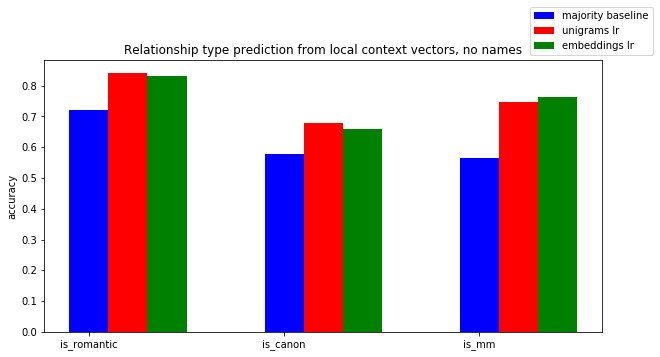

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt

n_comparisons = 3
x = np.arange(n_comparisons)

plt.figure(figsize=(10,5))
plt.title("Relationship type prediction from local context vectors, no names")
labels = list(results['baseline'].keys())
ax = plt.subplot(111)
ax.bar(x, list(results['baseline'].values()), width=0.2,color='b',align='center')
ax.bar(x+0.2, list(results['unigrams_lr'].values()), width=0.2,color='r',align='center')
ax.bar(x+0.4, list(results['embs_lr'].values()), width=0.2,color='g',align='center')
ax.legend(['majority baseline', 'unigrams lr', 'embeddings lr'], loc='lower right', bbox_to_anchor=(1.1,1))
ax.set_ylabel('accuracy')

plt.xticks(x,labels)
plt.savefig('/usr2/mamille2/fanfiction-project/output/relationship_type_prediction_nonames.png', dpi=200)
plt.show()


/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


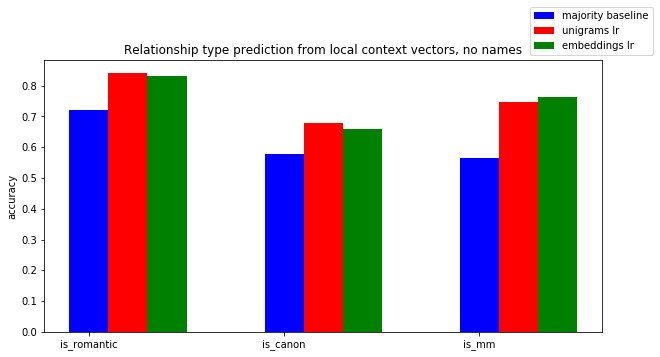

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt

n_comparisons = 3
x = np.arange(n_comparisons)

plt.figure(figsize=(10,5))
plt.title("Relationship type prediction from local context vectors, no names")
labels = list(results['baseline'].keys())
ax = plt.subplot(111)
ax.bar(x, list(results['baseline'].values()), width=0.2,color='b',align='center')
ax.bar(x+0.2, list(results['unigrams_lr'].values()), width=0.2,color='r',align='center')
ax.bar(x+0.4, list(results['embs_lr'].values()), width=0.2,color='g',align='center')
ax.legend(['majority baseline', 'unigrams lr', 'embeddings lr'], loc='lower right', bbox_to_anchor=(1.1,1))
ax.set_ylabel('accuracy')

plt.xticks(x,labels)
plt.savefig('/usr2/mamille2/fanfiction-project/output/relationship_type_prediction_nonames.png', dpi=200)
plt.show()


## Save out train, test fic_ids for Qinlan

In [41]:
len(data['fic_id'].unique())

3128

In [45]:
# train_fic_ids = train['fic_id'].unique()
# test_fic_ids = test['fic_id'].unique()
# train_fic_ids[:10]

array([ 2328185,  2637719,  7776190,  2211948, 11032785,   989537,
         388857,  5720908, 14959107, 11353125])

In [5]:
# print(len(train_fic_ids))
# print(len(test_fic_ids))
print(len(train_ids))
print(len(train['fic_id'].unique()))
print(len(test_ids))
print(len(test['fic_id'].unique()))

2815
2815
313
313


In [6]:
np.savetxt('/usr2/mamille2/fanfiction-project/data/ao3/harrypotter/emnlp_dataset_6k/fic_ids/train5400_fic_ids.nptxt', train_ids)
np.savetxt('/usr2/mamille2/fanfiction-project/data/ao3/harrypotter/emnlp_dataset_6k/fic_ids/test5400_fic_ids.nptxt', test_ids)

## Look at most informative unigram features

In [34]:
clf['unigrams_lr']['is_canon'].coef_.shape

(1, 671294)

In [35]:
# Load vectorizer
with open('/usr2/mamille2/fanfiction-project/temp/ngrams1_vectorizer_local.pkl', 'rb') as f:
    vectorizer = pickle.load(f)
    
print(len(vectorizer.vocabulary_))

/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


335647


/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.2 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [47]:
from IPython.core.debugger import set_trace

def print_top_features(vectorizer, clf, n=20):
    
    """Prints features with the highest coefficient values"""
    feature_names = [f'{name}_char1' for name in vectorizer.get_feature_names()] + \
                        [f'{name}_char2' for name in vectorizer.get_feature_names()]
    top_indices = np.argsort(clf.coef_[0])[-1*n:]
    print("\n".join(reversed([feature_names[j] for j in top_indices])))

In [54]:
def get_informative_features(features_vectorizer, model, n=20):
    feats_index2name = {v: k for k, v in features_vectorizer.vocabulary_.items()}
    feature_weights = model.coef_[0]
    
    top_indices = np.argsort(feature_weights)[-1*n:]
    top_weights = np.sort(feature_weights)[-1*n:]
    bottom_indices = np.argsort(feature_weights)[:n]
    bottom_weights = np.sort(feature_weights)[:n]

    lines = [] # to sort and print
    
    for i, (j, w) in enumerate(zip(reversed(top_indices), reversed(top_weights))):
        feature_name = feats_index2name[j]
        lines.append([i, feature_name, w, abs(w)])
    
    for i, (j, w) in enumerate(zip(bottom_indices, bottom_weights)):
        feature_name = feats_index2name[j]
        lines.append([i, feature_name, w, abs(w)])

    lines = list(reversed(sorted(lines, key=itemgetter(3))))

    # Print out
    return pd.DataFrame(lines, columns=['rank', 'feature_name', 'feature_weight', 'abs_feature_weight'])

In [48]:
print_top_features(vectorizer, clf['unigrams_lr']['is_canon'])

mate_char1
mate_char2
friend_char2
friend_char1
clit_char2
clit_char1
mione_char2
mione_char1
hermiona_char2
hermiona_char1
hermine_char1
hermine_char2
invisibility_char1
invisibility_char2
amigo_char2
amigo_char1
godfather_char1
godfather_char2
breasts_char1
breasts_char2


In [49]:
print_top_features(vectorizer, clf['unigrams_lr']['is_romantic'])

boyfriend_char1
boyfriend_char2
lips_char2
lips_char1
waist_char1
waist_char2
grey_char1
grey_char2
drawled_char2
drawled_char1
love_char1
love_char2
manos_char1
manos_char2
sodding_char2
sodding_char1
husband_char1
husband_char2
hand_char1
hand_char2


In [50]:
print_top_features(vectorizer, clf['unigrams_lr']['is_mm'])

mate_char2
mate_char1
blond_char1
blond_char2
boy_char2
boy_char1
blonde_char2
blonde_char1
auror_char2
auror_char1
aurors_char2
aurors_char1
prat_char1
prat_char2
snoring_char2
snoring_char1
rival_char2
rival_char1
green_char1
green_char2


# Stats on relationship prediction dataset

### Look at skew for fic-level is_canon, is_romantic, is_mm

In [2]:
import pandas as pd

# Load data
data = pd.read_pickle('/usr2/mamille2/fanfiction-project/data/features/relationship_prediction_assertion_sample5400.pkl')
print(len(data))
print(data.columns)

pairings = data['pairing'].unique()

5400
Index(['fic_id', 'pairing', 'pairing_embedding_unigrams_assertions_local_5',
       'pairing_embedding_unigrams_assertions_local_10',
       'pairing_embedding_unigrams_assertions_local_25',
       'pairing_embedding_unigrams_assertions_local_50', 'relationship',
       'selected_relationships', 'is_romantic', 'is_canon', 'is_mm',
       'shape_10', 'pairing_embedding_embs_adapted_10',
       'pairing_embedding_embs_aligned_10',
       'pairing_embedding_embs_background_10'],
      dtype='object')


In [35]:
print(len(data))
data.columns

5400


Index(['fic_id', 'pairing', 'pairing_embedding_unigrams_assertions_local_5',
       'pairing_embedding_unigrams_assertions_local_10',
       'pairing_embedding_unigrams_assertions_local_25',
       'pairing_embedding_unigrams_assertions_local_50', 'relationship',
       'selected_relationships', 'is_romantic', 'is_canon', 'is_mm',
       'shape_10', 'pairing_embedding_embs_adapted_10',
       'pairing_embedding_embs_aligned_10',
       'pairing_embedding_embs_background_10'],
      dtype='object')

In [36]:
data.loc[:,['fic_id', 'pairing', 'is_romantic', 'is_canon', 'is_mm']].to_csv('/usr2/mamille2/fanfiction-project/data/features/relationship_prediction_assertion_sample5400.csv', index=False)

In [3]:
# Group instance IDs
fic_groups = data.groupby('fic_id').groups
len(fic_groups)

3128

In [22]:
# Any is_canon, is_romantic, is_mm
fic_level = {k: {} for k in ['is_canon', 'is_romantic', 'is_mm']}

for fic_id, indices in list(fic_groups.items()):
    for key in ['is_canon', 'is_romantic', 'is_mm']:
#         print(data.loc[indices, key])
#         print(any(data.loc[indices, key]))
#         print()
        fic_level[key][fic_id] = any(data.loc[indices, key])

In [23]:
for key in ['is_canon', 'is_romantic', 'is_mm']:
    proportion = sum(fic_level[key].values()) / len(fic_level[key])
    print(f'{key}: {proportion}')

is_canon: 0.6918158567774936
is_romantic: 0.43350383631713557
is_mm: 0.5217391304347826


In [24]:
# Save out for Qinlan
perfic_data = pd.DataFrame(fic_level)
perfic_data

,is_canon,is_romantic,is_mm
1260,True,False,True
1261,True,False,True
2674,True,False,True
5223,True,False,False
7350,True,False,True
9773,False,False,False
10080,True,False,True
11353,True,False,True
19113,False,False,False
19129,True,False,True


In [25]:
perfic_data.to_csv('/usr2/mamille2/fanfiction-project/data/features/perfic_relationship_prediction_sample5400.csv', index=False)

### Other stats

In [17]:
print(train.shape)
print(train.columns)

(94795, 6)
Index(['fic_id', 'pairing', 'pairing_embedding', 'relationship',
       'selected_relationships', 'is_romantic'],
      dtype='object')


In [19]:
pairings = train['pairing'].unique()
print(pairings)

[('ron', 'harry') ('ginny', 'harry') ('draco', 'hermione')
 ('draco', 'harry') ('ron', 'hermione') ('hermione', 'harry')]


In [20]:
# Romantic Distro for each pairing

lines = []
for pairing in pairings:
    n_pairing = len(train[train['pairing']==pairing])
    n_romantic = len(train[(train['pairing']==pairing) & (train['is_romantic']==True)])
    n_not_romantic = n_pairing - n_romantic
    lines.append([pairing, n_pairing, n_romantic, n_not_romantic])
    
pd.DataFrame(lines, columns=['pairing', 'n_pairing', 'n_romantic', 'n_not_romantic'])

,pairing,n_pairing,n_romantic,n_not_romantic
0,"(ron, harry)",19188,949,18239
1,"(ginny, harry)",9725,2635,7090
2,"(draco, hermione)",8302,2857,5445
3,"(draco, harry)",21480,15188,6292
4,"(ron, hermione)",16526,3707,12819
5,"(hermione, harry)",19574,1032,18542


# Stats on paragraph both-character presence

In [22]:
import itertools

chars = ['harry', 'hermione', 'ron', 'draco', 'ginny']

combos = list(tuple(set(p)) for p in itertools.combinations(chars, 2))
combos

[('hermione', 'harry'),
 ('ron', 'harry'),
 ('draco', 'harry'),
 ('ginny', 'harry'),
 ('ron', 'hermione'),
 ('draco', 'hermione'),
 ('ginny', 'hermione'),
 ('draco', 'ron'),
 ('ginny', 'ron'),
 ('ginny', 'draco')]

## Count fics with ships

In [2]:
# Load fic metadata
import pandas as pd

metadata_fpath = '/usr2/scratch/fanfic/ao3_harrypotter_text/stories.csv'
metadata = pd.read_csv(metadata_fpath)
print(metadata.columns)
print(len(metadata))

Index(['fic_id', 'title', 'author', 'author_key', 'rating', 'category',
       'fandom', 'relationship', 'character', 'additional tags', 'language',
       'published', 'status', 'status date', 'words', 'comments', 'kudos',
       'bookmarks', 'hits', 'chapter_count', 'series', 'seriespart',
       'seriesid', 'summary', 'preface_notes', 'afterword_notes'],
      dtype='object')
179407


In [23]:
def find_relationships(relationship_str):
    
    found_relationships = []
    
    for rel in eval(relationship_str):
        
        pair = tuple(rel.lower().split('/'))
        if len(pair) != 2:
            continue
        
        found_chars = set()
        for i in range(2):
            for c in chars:
                if c in pair[i]:
                    found_chars.add(c)
                    break
#         if any([c in pair[0] for c in chars]) and any([c in pair[1] for c in chars]):
#             found_relationships.append(pair)                
        if len(found_chars) == 2:
            found_relationships.append(tuple(found_chars))
                    
    return list(set(found_relationships))

In [24]:
# Select fics with the selected characters, relationships
pd.set_option('display.max_colwidth', -1)

chars = ['harry', 'ginny', 'ron', 'draco', 'hermione']
metadata['selected_relationships'] = metadata['relationship'].map(find_relationships)
metadata.loc[:, ['selected_relationships', 'relationship']]

,selected_relationships,relationship
0,[],"[""Remus Lupin/Severus Snape""]"
1,[],[]
2,"[(draco, harry)]","[""Draco Malfoy/Harry Potter""]"
3,[],"[""Ozpin/Harry Potter"", ""Harry Potter/Voldemort""]"
4,[],"[""Hermione Granger/Cormac McLaggen"", ""Sirius Black/Hermione Granger""]"
5,[],"[""Albus Dumbledore/Gellert Grindelwald""]"
6,"[(draco, harry), (ginny, harry)]","[""Draco Malfoy/Harry Potter"", ""Astoria Greengrass/Draco Malfoy"", ""Harry Potter/Ginny Weasley"", ""Luna Lovegood/Rolf Scamander""]"
7,[],"[""Hermione Granger/Severus Snape""]"
8,"[(ginny, harry)]","[""Harry Potter/Ginny Weasley"", ""and whoever Harry says right?""]"
9,[],"[""Sirius Black/Remus Lupin""]"


In [60]:
outlines = []

for pairing in combos:
    n_fics = sum(metadata['selected_relationships'].map(lambda x: pairing in x))
    outlines.append([pairing, n_fics])
    
n_fics_df = pd.DataFrame(outlines, columns=['pairing', 'n_fics']).sort_values(['n_fics'], ascending=False)
n_fics_df

,pairing,n_fics
2,"(draco, harry)",28202
4,"(ron, hermione)",8286
3,"(ginny, harry)",6311
5,"(draco, hermione)",6310
0,"(hermione, harry)",1914
1,"(ron, harry)",1832
7,"(draco, ron)",926
9,"(ginny, draco)",844
6,"(ginny, hermione)",471
8,"(ginny, ron)",78


## Count paragraphs with both characters appearing

In [35]:
def pairing_present(text, pairing):
    if re.search(r'\b{}\b'.format(pairing[0]), text) and re.search(r'\b{}\b'.format(pairing[1]), text):
        return True
    else:
        return False

In [58]:
# Load paragraphs
import os
import re
from tqdm import tqdm_notebook as tqdm

fic_dirpath = '/usr2/scratch/fanfic/ao3_harrypotter_text/stories'

pairing_count = {pairing: {} for pairing in combos} # pairing: fic_id: count

for fname in tqdm(os.listdir(fic_dirpath)[:10000]):
# for fname in tqdm(os.listdir(fic_dirpath)):
    fic_id  = int(fname.split('_')[0])
    
    with open(os.path.join(fic_dirpath, fname)) as f:
        paras = f.read().splitlines()
#     paras = pd.read_csv(os.path.join(fic_dirpath, fname))['text'].tolist()

    
    for pairing in combos:
        n_paras_with_pairing = sum([pairing_present(para.lower(), pairing) for para in paras])
        pairing_count[pairing][fic_id] = n_paras_with_pairing
        
len(pairing_count)

10

In [61]:
outlines = []

for pairing in combos:
    outlines.append([pairing, sum(pairing_count[pairing].values())])
    
n_paras_df = pd.DataFrame(outlines, columns=['pairing', 'n_paras_10000'])
n_paras_df

,pairing,n_paras_10000
0,"(hermione, harry)",12296
1,"(ron, harry)",10632
2,"(draco, harry)",23193
3,"(ginny, harry)",4528
4,"(ron, hermione)",8153
5,"(draco, hermione)",5262
6,"(ginny, hermione)",2853
7,"(draco, ron)",2367
8,"(ginny, ron)",2075
9,"(ginny, draco)",1285


In [63]:
merged = pd.merge(n_paras_df, n_fics_df)
merged.sort_values(['n_fics'], ascending=False)

,pairing,n_paras_10000,n_fics
2,"(draco, harry)",23193,28202
4,"(ron, hermione)",8153,8286
3,"(ginny, harry)",4528,6311
5,"(draco, hermione)",5262,6310
0,"(hermione, harry)",12296,1914
1,"(ron, harry)",10632,1832
7,"(draco, ron)",2367,926
9,"(ginny, draco)",1285,844
6,"(ginny, hermione)",2853,471
8,"(ginny, ron)",2075,78


# Check overlap with old LM embeddings for canon/non-canon relationship prediction

In [1]:
import os

lm_embeddings_dirpath = '/usr0/home/jfiacco/Research/fanfic/language_model/avg_vocab_vectors/combined/'

lm_fic_ids = [int(fname.split('.txt')[0]) for fname in os.listdir(lm_embeddings_dirpath)]
len(lm_fic_ids)

42792

In [4]:
# Load data for context char embeddings
import pandas as pd

chars = ['harry', 'ron', 'hermione', 'draco', 'ginny']

fanfic_dirpath = '/usr0/home/mamille2/erebor/fanfiction-project/'
fivechar_dirpath = os.path.join(fanfic_dirpath, 'data', 'ao3', 'harrypotter', 'five_char_dataset')

lc_data = {}
for c in chars:
    lc_data[c] = {}
    for fold in ['train', 'dev', 'test']:
        lc_data[c][fold] = pd.read_csv(os.path.join(fivechar_dirpath, c, f'{fold}_metadata.csv'))
    
lc_data['harry']['train'].columns

Index(['fic_id', 'title', 'author', 'author_key', 'rating', 'category',
       'fandom', 'relationship', 'character', 'additional tags', 'language',
       'published', 'status', 'status date', 'words', 'comments', 'kudos',
       'bookmarks', 'hits', 'chapter_count', 'series', 'seriespart',
       'seriesid', 'summary', 'preface_notes', 'afterword_notes',
       'selected_chars', 'selected_relationships', 'canon_relationship_harry'],
      dtype='object')

In [5]:
lc_fic_ids = set()

for c in chars:
    for fold in ['train', 'dev', 'test']:
        lc_fic_ids |= set(lc_data[c][fold]['fic_id'])
        
len(lc_fic_ids)

37534

In [6]:
# Overlap
lm_fic_ids = set(lm_fic_ids)
overlap = lc_fic_ids.intersection(lm_fic_ids)
len(overlap)

24914

# Get old LM distances to canon

## Load fanfic contextual embeddings

In [13]:
chars = [
    'harry',
    'hermione',
    'ron',
    'draco',
    'ginny'
]

In [19]:
import os
from gensim.models import Word2Vec
import numpy as np
from tqdm import tqdm_notebook as tqdm

lm_embeddings_dirpath = '/usr0/home/jfiacco/Research/fanfic/language_model/avg_vocab_vectors/combined/'

fanfic_embs = {}

for fname in tqdm(os.listdir(lm_embeddings_dirpath)):
    fpath = os.path.join(lm_embeddings_dirpath, fname)
    fic_id = int(fname.split('.')[0])
    fanfic_embs[fic_id] = {}
    
    with open(fpath) as f:
        lines = [line for line in f.read().splitlines() if any([line.startswith(c) for c in chars])]
        for line in lines:
            segments = line.split('\t')
            fanfic_embs[fic_id][segments[0]] = np.array([np.float(x) for x in segments[1:]])
    #         fanfic_embs = Word2Vec.load(fpath)

## Load canon contextual embeddings

In [ ]:
canon_lm_embeddings_fpath = '/u/usr0/home/jfiacco/fiacco/fiacco/fiacco/o/o/o/o/cco/cco/cco/Research/fanfic/language_model/avg_vocab_vectors/canon.vocab.no_transform.avg.context.embs'
canon_embs['all'] = {}

with open(canon_lm_embeddings_fpath) as f:
    lines = [line for line in f.read().splitlines() if any([line.startswith(c) for c in chars])]
    for line in lines:
        segments = line.split('\t')
        canon_embs[fic_id][segments[0]] = np.array([np.float(x) for x in segments[1:]])

# Merge in character embeddings with canon/non-canon relationship prediction

In [54]:
# Load per-fic character embeddings
import pickle

with open(os.path.join(fanfic_dirpath, 'embeddings', 'char_vecs_lc_tfidf.pkl'), 'rb') as f:
    char_vecs = pickle.load(f)
    
char_vecs.keys()

dict_keys(['harry', 'hermione', 'ron', 'ginny', 'draco', 'neville', 'luna', 'remus', 'sirius', 'severus', 'james', 'lily'])

In [76]:
char_vecs['harry'].keys()

dict_keys(['fanfic', 'canon', 'dist_f-c', 'fanfic_lc10_context', 'fanfic_lc10_context_per_fic', 'canon_lc10_context', 'canon_lc10_context_per_story', 'dist_lc10_context_f-c'])

In [57]:
len(char_vecs['harry']['fanfic_lc10_context_per_fic'])

39202

In [60]:
test = pd.DataFrame(char_vecs['harry']['fanfic_lc10_context_per_fic']).T
test.index = test.index.map(lambda x: int(x[:-4]))
test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
10002920,-0.563079,-0.912863,5.192941,1.391572,-1.416847,1.209724,-2.492879,0.939427,1.061941,1.098274,...,-0.141660,-0.146195,-2.580225,-0.801113,-1.318014,-1.661269,-0.141227,1.385546,1.061034,0.446430
10005209,-0.817590,-0.961636,6.256079,1.681216,-1.625711,1.337347,-3.025377,1.272682,0.980964,1.326015,...,-0.054414,-0.463044,-2.749567,-0.853057,-1.526851,-1.876099,-0.191148,1.340467,1.328861,0.411404
100053,-0.739075,-0.915448,5.251790,1.631000,-1.333833,1.111584,-2.118858,1.036509,0.950668,1.119434,...,-0.269066,-0.398878,-2.354977,-1.276196,-0.980605,-1.638189,-0.223674,1.216462,1.219955,0.278454
10006340,-0.887015,-1.533361,6.878336,1.979643,-1.143677,1.758736,-2.713030,2.080046,0.726897,1.771071,...,-0.256524,-0.675560,-3.068216,-1.684203,-1.191740,-2.782096,-0.366973,0.413559,2.155125,0.151265
100071,-0.753497,-0.445606,5.855215,2.766968,-1.093390,0.918897,-3.207910,0.448776,1.267283,1.435619,...,-0.290152,-0.187627,-2.590912,-1.475813,-1.202538,-2.037141,0.099256,2.277176,1.093532,-0.501130
1000792,-0.695429,-0.975252,5.597158,1.479929,-1.280302,1.028900,-2.995022,0.877727,1.154345,1.366800,...,-0.107521,-0.226124,-2.614860,-0.963776,-1.469352,-2.006224,-0.042740,1.740632,0.969605,0.511503
100084,-0.733977,-0.474229,6.085955,1.612738,-2.011450,0.929083,-3.061384,1.052670,1.265115,1.199325,...,0.014273,-0.131033,-2.397573,-0.934109,-1.664665,-2.171716,-0.035016,1.131679,1.100107,0.456210
1000853,-0.536895,-1.024696,5.915479,1.891398,-1.813375,1.185624,-2.468521,1.195781,1.164216,0.783363,...,-0.177816,-0.258624,-2.937076,-0.708561,-1.642990,-1.478262,-0.201473,1.349980,1.463694,0.250444
10009748,-0.649756,-0.947080,5.708753,1.691498,-1.575599,1.420256,-2.779433,1.181029,1.093210,1.204746,...,-0.270103,-0.279255,-2.870032,-0.935765,-1.321772,-1.783893,-0.202184,1.464977,1.142142,0.446048
1001111,-0.769807,-1.364423,5.580817,1.593762,-1.475809,1.225929,-2.416351,1.039197,0.968637,1.323254,...,-0.423940,-0.140237,-2.489006,-1.272431,-1.343087,-1.906641,-0.009959,1.307964,1.393990,0.297595


In [62]:
merged = pd.merge(chars_split['harry']['train'], test, right_index=True, left_on='fic_id')
print(merged.columns)
print(len(merged))

Index([         'fic_id',           'title',          'author',
            'author_key',          'rating',        'category',
                'fandom',    'relationship',       'character',
       'additional tags',
       ...
                      90,                91,                92,
                      93,                94,                95,
                      96,                97,                98,
                      99],
      dtype='object', length=129)
19940


In [64]:
len(test)

39202

In [65]:
len(metadata_chars['harry'])

27617

In [63]:
len(chars_split['harry']['train'])

22093

In [66]:
# TODO: update to get fics where chars only mentioned in relationship tags (have to get embs for them)

char_embs_data = {}

for c in chars:
    char_embs_data[c] =  {}
    for fold in chars_split[c]:
        char_embs = pd.DataFrame(char_vecs[c]['fanfic_lc10_context_per_fic']).T
        char_embs.index = char_embs.index.map(lambda x: int(x[:-4]))
        
        merged = pd.merge(chars_split[c][fold], char_embs, right_index=True, left_on='fic_id')
        
        char_embs_data[c][fold] = merged
        
#         chars_split[c][fold][f'{c}_mt_embedding_add'] = char_vecs['harry']['fanfic_lc10_context_per_fic']

# MLP char embeddings -> canon or not

In [75]:
from sklearn.neural_network import MLPClassifier

for c in chars:
    print(c)
    clf = MLPClassifier(hidden_layer_sizes=(50,10))
    clf.fit(char_embs_data[c]['train'].loc[:, range(100)], char_embs_data[c]['train'][f'canon_relationship_{c}'])
    
    majority_score = 1 - char_embs_data[c]['dev'][f'canon_relationship_{c}'].sum() / len(char_embs_data[c]['dev'])
    
    preds = clf.predict(char_embs_data[c]['dev'].loc[:, range(100)])
    print(sum(preds))
    
#     score = clf.score(char_embs_data[c]['dev'].loc[:, range(100)], char_embs_data[c]['dev'][f'canon_relationship_{c}'])
    score = np.mean(preds == char_embs_data[c]['dev'][f"canon_relationship_{c}"])
    
    print(majority_score)
    print(score)
    print()

harry
2
0.909807010634108
0.909807010634108

ginny
4
0.6817359855334539
0.6781193490054249

ron
3
0.7733773377337734
0.7722772277227723

draco
0
0.970209884901828
0.970209884901828

hermione
0
0.8348017621145374
0.8348017621145375



# Find fics with selected 5 characters, split train/dev/test

In [15]:
import pandas as pd

fanfic_dirpath = '/usr0/home/mamille2/erebor/fanfiction-project/'

metadata_fpath = os.path.join(fanfic_dirpath, 'data/ao3/harrypotter/dataset_1k-5k/metadata.csv')
metadata = pd.read_csv(metadata_fpath)
print(len(metadata))
print(metadata.columns)

67957
Index(['fic_id', 'title', 'author', 'author_key', 'rating', 'category',
       'fandom', 'relationship', 'character', 'additional tags', 'language',
       'published', 'status', 'status date', 'words', 'comments', 'kudos',
       'bookmarks', 'hits', 'chapter_count', 'series', 'seriespart',
       'seriesid', 'summary', 'preface_notes', 'afterword_notes'],
      dtype='object')


In [18]:
def find_chars(char_str):
    
    found_chars = []
    
    for char in eval(char_str):
        for c in chars:
            if c in char.lower():
                found_chars.append(c)
                
    return found_chars

In [35]:
def find_relationships(relationship_str):
    
    found_relationships = []
    
    for rel in eval(relationship_str):
        
        pair = tuple(rel.lower().split('/'))
        if len(pair) < 2:
            continue
        
        for c in chars:
            for p in pair:
                if c in p:
                    found_relationships.append(pair)                
                    
    return list(set(found_relationships))

In [36]:
# Select fics with the selected characters, relationships
pd.set_option('display.max_colwidth', -1)

chars = ['harry', 'ginny', 'ron', 'draco', 'hermione']
metadata['selected_chars'] = metadata['character'].map(find_chars)
metadata['selected_relationships'] = metadata['relationship'].map(find_relationships)
metadata.loc[:, ['selected_chars', 'character', 'selected_relationships', 'relationship']]

,selected_chars,character,selected_relationships,relationship
0,[],"[""Sirius Black"", ""Remus Lupin"", ""James Potter""]",[],"[""Sirius Black/Remus Lupin""]"
1,[draco],"[""Bellatrix Lestrange"", ""Draco Malfoy""]","[(bellatrix lestrange, draco malfoy)]","[""Bellatrix Lestrange/Draco Malfoy""]"
2,[],"[""Luna Lovegood"", ""Severus Snape""]",[],"[""Luna Lovegood & Fate"", ""Luna Lovegood & Severus Snape""]"
3,[],[],"[(harry potter, ron weasley)]","[""Harry Potter/Ron Weasley""]"
4,[],[],"[(harry potter, other(s))]","[""Harry Potter/Other(s)""]"
5,[],"[""Cedric Diggory"", ""Amos Diggory"", ""Pomona Sprout"", ""Angelina Johnson"", ""Cho Chang"", ""Minerva McGonagall""]",[],[]
6,[],"[""Madam Hooch"", ""Minvera McGonagall""]",[],"[""Madam Hooch/Minerva McGonagall""]"
7,[],"[""Hannah Abbott""]",[],[]
8,[],"[""Bellatrix Black Lestrange"", ""Original Female Character(s)""]",[],"[""Bellatrix Black Lestrange/Original Female"", ""Bellatrix Black Lestrange & Rodolphus Lestrange""]"
9,[hermione],"[""Loki (Marvel)"", ""Sleipnir"", ""J\u00f6rmungandr | Jormungand | Midgard Serpent"", ""Fenrir"", ""Hel | Hela"", ""Vali"", ""Nari"", ""Pietro Maximoff"", ""Mycroft Holmes"", ""Sherlock Holmes"", ""Hermione Granger"", ""Dean Winchester"", ""Sam Winchester""]",[],[]


In [50]:
metadata_chars = {}

print(f"total: {len(metadata)}")
for c in chars:
    metadata_chars[c] = metadata[(metadata['selected_chars'].map(lambda x: c in x)) | (metadata['selected_relationships'].map(lambda x: any([c in p for p in x])))]
    print(f"{c}: {len(metadata_chars[c])}")
    
    metadata_chars[c][f'canon_relationship_{c}'] = \
        [is_canon_relationship(c, relationships) for relationships in metadata_chars[c]['selected_relationships']]

total: 67957
harry: 27617


/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


ginny: 6331
ron: 10650
draco: 16323
hermione: 15099


In [45]:
canon_relationships = {
    'harry': 'ginny',
    'draco': 'astoria',
    'hermione': 'ron',
    'ron': 'hermione',
    'ginny': 'harry',
}

def is_canon_relationship(char, relationships):
    
    is_canon = False
    
    for rel in relationships:
        if len(rel) != 2:
            continue
        if any([char in c for c in rel]) and any([canon_relationships[char] in c for c in rel]):
            is_canon = True
            
    return is_canon

In [51]:
# Split each char data into train/dev/test
from sklearn.model_selection import train_test_split

chars_split = {}

for c in chars:
    chars_split[c] = {}
    chars_split[c]['train'], chars_split[c]['dev'], chars_split[c]['test'] = np.split(
            metadata_chars[c],
            [int(.8 * len(metadata_chars[c])),
             int(.9 * len(metadata_chars[c]))]
    )

In [52]:
# canon/non-canon relationship stats

for c in chars:
    n_canon = chars_split[c]['train'][f'canon_relationship_{c}'].sum()
    total_fics = len(chars_split[c]['train'])
    print(f"{c}: {n_canon/total_fics: .1%} ({n_canon} / {total_fics}) canon relationship")

harry:  7.3% (1604 / 22093) canon relationship
ginny:  29.0% (1468 / 5064) canon relationship
ron:  22.3% (1903 / 8520) canon relationship
draco:  2.5% (326 / 13058) canon relationship
hermione:  16.3% (1968 / 12079) canon relationship


In [53]:
# Save out data
fivechar_dirpath = os.path.join(fanfic_dirpath, 'data', 'ao3', 'harrypotter', 'five_char_dataset')
if not os.path.exists(fivechar_dirpath):
    os.mkdir(fivechar_dirpath)

for c in chars:
    if not os.path.exists(os.path.join(fivechar_dirpath, c)):
        os.mkdir(os.path.join(fivechar_dirpath, c))
    
    for fold, data in chars_split[c].items():
        data.to_csv(os.path.join(fivechar_dirpath, c, f'{fold}_metadata.csv'), index=False)

# Plot TSNE output from script

In [2]:
# Load embeddings
import os
import numpy as np

output_dirpath = '/usr0/home/mamille2/erebor/fanfiction-project/output/'

# Load contextualized TSNE embeddings
char_tsne_fpath = '/usr0/home/mamille2/erebor/fanfiction-project/output/tsne_chars_lc10_context.nptxt'
char_labels_fpath = '/usr0/home/mamille2/erebor/fanfiction-project/output/tsne_chars_lc10_context_labels.nptxt'
char_fnames_fpath = '/usr0/home/mamille2/erebor/fanfiction-project/output/tsne_fnames_lc10_context.nptxt'

tsne_embs = np.loadtxt(char_tsne_fpath)
print(tsne_embs.shape)

with open(char_labels_fpath, 'r') as f:
    char_labels = f.read().splitlines()
    print(len(char_labels))
    
with open(char_fnames_fpath, 'r') as f:
    char_fnames = f.read().splitlines()
    print(len(char_fnames))

(120094, 2)
120094
120094


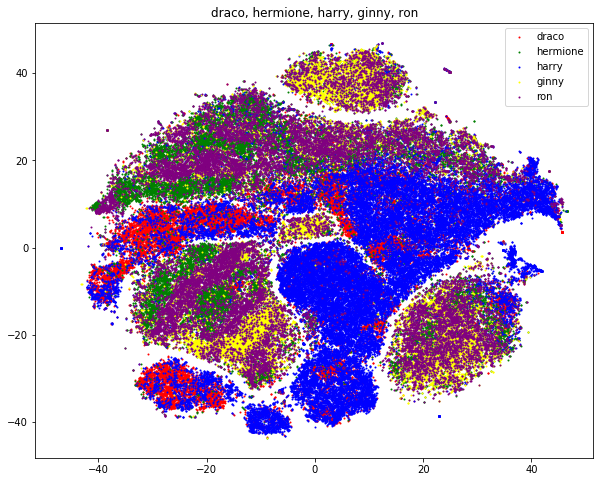

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

cdict = {'draco': 'red', 'hermione': 'green', 'harry': 'blue', 'ginny': 'yellow', 'ron': 'purple'}
selected_chars = list(cdict.keys())
# selected_chars = ['harry', 'draco', 'ginny']
# selected_chars = ['harry', 'hermione', 'ron']
# selected_chars = ['hermione', 'ron', 'draco']
# selected_chars = ['hermione', 'ron']
# selected_chars = ['hermione', 'draco']
# selected_chars = ['harry', 'draco']
#selected_chars = ['ginny', 'harry']


fig, ax = plt.subplots(figsize=(10,8))
for c in selected_chars:
    ix = np.where(np.array(char_labels) == c)
#     plt.scatter(tsne_reduced[:,0][ix], tsne_reduced[:,1][ix], c=[chars2i[c] for c in char_labels], s=1, label=char_labels)
#     plt.scatter(tsne_reduced[:,0][ix], tsne_reduced[:,1][ix], c=chars2i[c], s=1, label=c)
#     ax.scatter(tsne_reduced[:,0][ix], tsne_reduced[:,1][ix], c=chars2i[c], s=1, label=c)
    ax.scatter(tsne_embs[:,0][ix], tsne_embs[:,1][ix], c=cdict[c], s=1, label=c)
    
plt.title(f'{", ".join(selected_chars)}')
    
ax.legend()
plt.show()

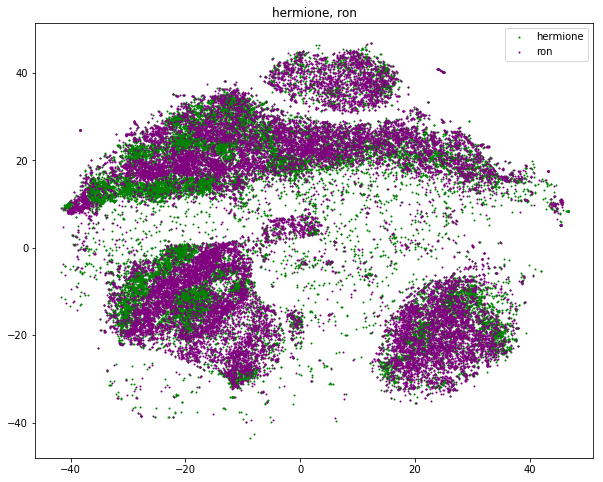

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

cdict = {'draco': 'red', 'hermione': 'green', 'harry': 'blue', 'ginny': 'yellow', 'ron': 'purple'}
# selected_chars = list(cdict.keys())
# selected_chars = ['harry', 'draco', 'ginny']
# selected_chars = ['harry', 'hermione', 'ron']
# selected_chars = ['hermione', 'ron', 'draco']
selected_chars = ['hermione', 'ron']
# selected_chars = ['hermione', 'draco']
# selected_chars = ['harry', 'draco']
#selected_chars = ['ginny', 'harry']


fig, ax = plt.subplots(figsize=(10,8))
for c in selected_chars:
    ix = np.where(np.array(char_labels) == c)
#     plt.scatter(tsne_reduced[:,0][ix], tsne_reduced[:,1][ix], c=[chars2i[c] for c in char_labels], s=1, label=char_labels)
#     plt.scatter(tsne_reduced[:,0][ix], tsne_reduced[:,1][ix], c=chars2i[c], s=1, label=c)
#     ax.scatter(tsne_reduced[:,0][ix], tsne_reduced[:,1][ix], c=chars2i[c], s=1, label=c)
    ax.scatter(tsne_embs[:,0][ix], tsne_embs[:,1][ix], c=cdict[c], s=1, label=c)
    
plt.title(f'{", ".join(selected_chars)}')
    
ax.legend()
plt.show()

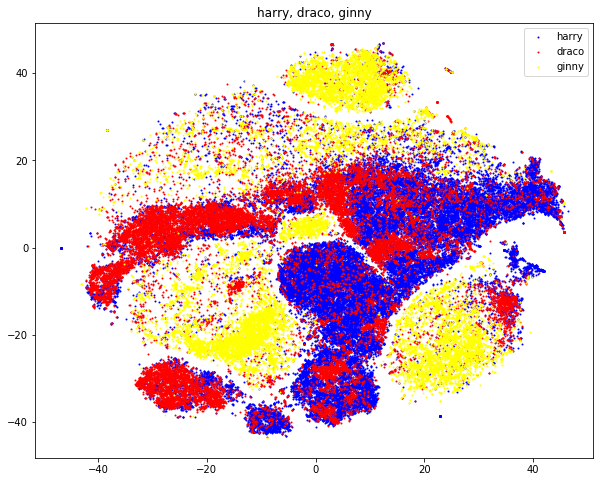

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

cdict = {'draco': 'red', 'hermione': 'green', 'harry': 'blue', 'ginny': 'yellow', 'ron': 'purple'}
# selected_chars = list(cdict.keys())
selected_chars = ['harry', 'draco', 'ginny']
# selected_chars = ['harry', 'hermione', 'ron']
# selected_chars = ['hermione', 'ron', 'draco']
# selected_chars = ['hermione', 'ron']
# selected_chars = ['hermione', 'draco']
# selected_chars = ['harry', 'draco']
# selected_chars = ['ginny', 'harry']


fig, ax = plt.subplots(figsize=(10,8))
for c in selected_chars:
    ix = np.where(np.array(char_labels) == c)
#     plt.scatter(tsne_reduced[:,0][ix], tsne_reduced[:,1][ix], c=[chars2i[c] for c in char_labels], s=1, label=char_labels)
#     plt.scatter(tsne_reduced[:,0][ix], tsne_reduced[:,1][ix], c=chars2i[c], s=1, label=c)
#     ax.scatter(tsne_reduced[:,0][ix], tsne_reduced[:,1][ix], c=chars2i[c], s=1, label=c)
    ax.scatter(tsne_embs[:,0][ix], tsne_embs[:,1][ix], c=cdict[c], s=1, label=c)
    
plt.title(f'{", ".join(selected_chars)}')
    
ax.legend()
plt.show()

# Calculate distances between character embeddings fanfic <-> canon

In [1]:
from gensim.models import KeyedVectors, FastText 

In [2]:
fanfic_mt_embs_fpath = '/usr0/home/jfiacco/Research/fanfic/embeddings/fanfic.harry_potter.1k-5k.lower.model.vec'
fanfic_mt_embs = KeyedVectors.load_word2vec_format(fanfic_mt_embs_fpath)

# fanfic_mt_embs_fpath = '/usr0/home/jfiacco/Research/fanfic/embeddings/fanfic.harry_potter.1k-5k.lower.model.bin'
# fanfic_mt_embs = FastText.load_fasttext_format(fanfic_embs_fpath)

In [3]:
canon_mt_embs_fpath = '/usr0/home/jfiacco/Research/fanfic/embeddings/canon.harry_potter.lower.model.vec'

canon_mt_embs = KeyedVectors.load_word2vec_format(canon_mt_embs_fpath)

## Align embeddings to background space

In [4]:
# Load transformation matrices
import numpy as np

fanfic2bg_path = '/usr0/home/qinlans/ACL_2019/transformation_matrices/fanfic_to_background.harry_potter.mikolov.nptxt'
fanfic2bg = np.loadtxt(fanfic2bg_path)
print(fanfic2bg.shape)

canon2bg_path = '/usr0/home/qinlans/ACL_2019/transformation_matrices/canon_to_background.harry_potter.mikolov.nptxt'
canon2bg = np.loadtxt(canon2bg_path)
print(canon2bg.shape)

(100, 100)
(100, 100)


In [5]:
minor_chars = [
    'percy',
    'fred',
    'lavender',
]

chars = [
    'harry',
    'hermione',
    'ron',
    'ginny',
    'draco',
    'sirius',
    'remus',
    'severus',
    'neville',
    'luna',
] + minor_chars

print(len(chars))
print(len(minor_chars))

13
3


In [7]:
char_vecs = {}

for c in chars:
# for c in minor_chars:
    char_vecs[c] = {}
    char_vecs[c]['fanfic'] = np.matmul(fanfic2bg, fanfic_mt_embs[c]) 
    char_vecs[c]['canon'] = np.matmul(canon2bg, canon_mt_embs[c]) 

In [8]:
from scipy.spatial.distance import cosine

for c in chars:
# for c in minor_chars:
    char_vecs[c]['dist_f-c'] = cosine(char_vecs[c]['fanfic'], char_vecs[c]['canon'])

# Calculate local context character name vectors

In [9]:
context_windows = [10, 25, 50] # before and after, so total window is this value * 2
fics_fpath = '/usr0/home/mamille2/erebor/fanfiction-project/data/ao3/harrypotter/dataset_1k-5k/filtered_paras'
canon_fpath = '/usr0/home/jfiacco/Research/fanfic/canon_data/harry_potter_tokenized/'

## Local context for fanfic

In [11]:
import os
from tqdm import tqdm_notebook as tqdm

char_contexts_fanfic = {}
for c in chars:
    char_contexts_fanfic[c] = {w: [] for w in context_windows}

for fname in tqdm(sorted(os.listdir(fics_fpath))):
    
    with open(os.path.join(fics_fpath, fname)) as f:
        paras = [p.split() for p in f.read().splitlines()]
        for c in chars:
#         for c in minor_chars:
            
            fic_contexts = {w: [] for w in context_windows}
            
            for para in paras:
                for idx in [i for i,token in enumerate(para) if token==c]:
                    for context_window in context_windows:
                        
                        fic_contexts[context_window] += para[max(0, idx-context_window) : idx] # before
                        fic_contexts[context_window] += para[idx+1 : min(idx+1+context_window, len(para))] # after
    
            for context_window in context_windows:
                char_contexts_fanfic[c][context_window].append(fic_contexts[context_window])

In [12]:
# Build, store aligned fanfic vectors

fanfic_aligned = {}

for c in tqdm(chars):
# for c in tqdm(minor_chars):
    for context_window in context_windows:
        for context_wds in char_contexts_fanfic[c][context_window]:
            context_wds = set(context_wds)
            for w in context_wds:
                if not w in fanfic_aligned and w in fanfic_mt_embs:
                    fanfic_aligned[w] = np.matmul(fanfic2bg, fanfic_mt_embs[w])

In [14]:
char_contexts_fanfic['harry'][10][:10]

[[],
 [],
 [],
 ['a',
  'loud',
  'sigh',
  'followed',
  'by',
  'her',
  'usual',
  'mantra',
  ',',
  '“',
  ',',
  'will',
  'you',
  'just',
  'tell',
  'him',
  'already',
  '!',
  'it',
  'will',
  'just',
  'nodded',
  ',',
  'but',
  'inside',
  'he',
  'was',
  'a',
  'bundle',
  'of',
  '?',
  'flourish',
  'and',
  'blotts',
  'is',
  'selling',
  'a',
  'new',
  'book',
  'about',
  '.',
  'it',
  'says',
  '…',
  ')',
  '.',
  '.',
  'and',
  'he',
  'had',
  'never',
  'felt',
  'anything',
  'but',
  'friendship',
  'from',
  '.',
  'so',
  ',',
  'there',
  'it',
  'was',
  '…',
  'friendship',
  '.',
  'he',
  'maybe',
  'not',
  'satisfied',
  ',',
  'but',
  'certainly',
  'thankful',
  'to',
  'remain',
  'in',
  '’s',
  'life',
  '.',
  '“',
  'you',
  ',',
  '”',
  'hermione',
  'softly',
  'said',
  'to',
  '.',
  'each',
  'occupant',
  '.',
  'ron',
  'looked',
  'to',
  'hermione',
  'and',
  'then',
  'to',
  '.',
  'hermione',
  'looked',
  'to',
  'harry',

In [19]:
# Get TF-IDF weighting for terms

from sklearn.feature_extraction.text import TfidfVectorizer

idf_weights_fanfic = {}

for c in chars:
    idf_weights_fanfic[c] = {}
    
    for cw in tqdm(context_windows):
        vectorizer = TfidfVectorizer(stop_words='english')
        vectorizer.fit([' '.join(toks) for toks in char_contexts_fanfic[c][cw]])
        idf_weights_fanfic[c][cw] = (vectorizer.vocabulary_, vectorizer.idf_)

In [20]:
idf_weights['harry'][10][1].shape

(60042,)

In [46]:
from IPython.core.debugger import set_trace

# Get contextualized fanfic vectors

# char_vecs_per_fic = {c: {cw: [] for cw in context_windows} for c in chars}
char_vecs_per_fic = {}
for c in chars:
    char_vecs_per_fic[c] = {w: [] for w in context_windows}

for c in tqdm(chars):
# for c in tqdm(minor_chars):
    for cw in context_windows:
        for context_wds in char_contexts_fanfic[c][cw]: # for every fic, sorted
            if len(context_wds) == 0: continue
                
            wd_indices, wd_weights = idf_weights[c][cw]
            context_embs = [fanfic_aligned[w] * wd_weights[wd_indices[w]] for w in context_wds if \
                            w in fanfic_mt_embs and w in wd_indices]
            context_vec = np.mean(context_embs, axis=0)
            
#             char_vec = np.hstack([char_vecs[c]['fanfic'], context_vec])
#             if char_vec.shape != (200,): continue # only context words found are not in vocabulary
#             char_vec = np.mean([char_vecs[c]['fanfic'], context_vec], axis=0)

            char_vec = context_vec
            if char_vec.shape != (100,): continue # only context words found are not in vocabulary
            char_vecs_per_fic[c][cw].append(char_vec)

        char_vecs[c][f'fanfic_lc{cw}_context'] = np.mean(char_vecs_per_fic[c][cw], axis=0)
#         print(char_vecs[c][f'fanfic_lc{cw}_context'].shape)

/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [38]:
len(char_contexts_fanfic['harry'][10])

67957

In [47]:
len(char_vecs_per_fic['harry'][10])

39202

In [40]:
idf_weights['harry'][10][0]

{'loud': 30728,
 'sigh': 47249,
 'followed': 20081,
 'usual': 56484,
 'mantra': 31600,
 'just': 28384,
 'tell': 52342,
 'nodded': 35257,
 'inside': 27003,
 'bundle': 7204,
 'flourish': 19915,
 'blotts': 5911,
 'selling': 46173,
 'new': 34925,
 'book': 6224,
 'says': 45387,
 'felt': 19017,
 'friendship': 20654,
 'maybe': 32017,
 'satisfied': 45285,
 'certainly': 8492,
 'thankful': 52645,
 'remain': 43038,
 'life': 30050,
 'hermione': 24356,
 'softly': 48645,
 'said': 44978,
 'occupant': 35926,
 'ron': 44371,
 'looked': 30611,
 'harry': 23725,
 'process': 40471,
 'repeated': 43230,
 'silence': 47306,
 'reigned': 42844,
 'flat': 19657,
 'finally': 19345,
 'garnered': 21278,
 'strength': 50536,
 'ask': 3410,
 'wh': 58281,
 'loves': 30782,
 'like': 30132,
 'love': 30757,
 'closed': 9645,
 'door': 15172,
 'did': 14018,
 'want': 57778,
 'look': 30607,
 'horror': 25140,
 'face': 18443,
 'heard': 24002,
 'clear': 9494,
 'throat': 52956,
 'say': 45379,
 'short': 46963,
 'affirmative': 1448,
 'no

## Local context for canon

In [26]:
import os
from tqdm import tqdm_notebook as tqdm

char_contexts_canon = {}
for c in chars:
    char_contexts_canon[c] = {w: [] for w in context_windows}

for fname in tqdm(sorted(os.listdir(canon_fpath))):
    
    with open(os.path.join(canon_fpath, fname)) as f:
        paras = [p.lower().split() for p in f.read().splitlines()]
        for c in chars:
#         for c in minor_chars:
            
            fic_contexts = {w: [] for w in context_windows}
            
            for para in paras:
                for idx in [i for i,token in enumerate(para) if token==c]:
                    for context_window in context_windows:
                        
                        fic_contexts[context_window] += para[max(0, idx-context_window) : idx] # before
                        fic_contexts[context_window] += para[idx+1 : min(idx+1+context_window, len(para))] # after
    
            for context_window in context_windows:
                char_contexts_canon[c][context_window].append(fic_contexts[context_window])

In [27]:
# Build, store aligned canon vectors

canon_aligned = {}

for c in tqdm(chars):
# for c in tqdm(minor_chars):
    for context_window in context_windows:
        for context_wds in char_contexts_canon[c][context_window]:
            context_wds = set(context_wds)
            for w in context_wds:
                if not w in canon_aligned and w in canon_mt_embs:
                    canon_aligned[w] = np.matmul(canon2bg, canon_mt_embs[w])

In [28]:
# Get TF-IDF weighting for terms

from sklearn.feature_extraction.text import TfidfVectorizer

idf_weights_canon = {}

for c in tqdm(chars):
    idf_weights_canon[c] = {}
    
    for cw in context_windows:
        vectorizer = TfidfVectorizer(stop_words='english')
        vectorizer.fit([' '.join(toks) for toks in char_contexts_canon[c][cw]])
        idf_weights_canon[c][cw] = (vectorizer.vocabulary_, vectorizer.idf_)

In [48]:
from IPython.core.debugger import set_trace

# Get contextualized canon vectors

# char_vecs_per_canon = {c: {cw: [] for cw in context_windows} for c in chars}
char_vecs_per_canon = {}
for c in chars:
    char_vecs_per_canon[c] = {w: [] for w in context_windows}

for c in tqdm(chars):
# for c in tqdm(minor_chars):
    for cw in context_windows:
        for context_wds in char_contexts_canon[c][cw]: # for every canon, sorted
            if len(context_wds) == 0: continue
                
            wd_indices, wd_weights = idf_weights[c][cw]
            context_embs = [canon_aligned[w] * wd_weights[wd_indices[w]] for w in context_wds if \
                            w in canon_mt_embs and w in wd_indices]
            context_vec = np.mean(context_embs, axis=0)
            
#             char_vec = np.hstack([char_vecs[c]['canon'], context_vec])
#             if char_vec.shape != (200,): continue # only context words found are not in vocabulary
#             char_vec = np.mean([char_vecs[c]['canon'], context_vec], axis=0)

            char_vec = context_vec
            if char_vec.shape != (100,): continue # only context words found are not in vocabulary
            char_vecs_per_canon[c][cw].append(char_vec)

        char_vecs[c][f'canon_lc{cw}_context'] = np.mean(char_vecs_per_canon[c][cw], axis=0)
#         print(char_vecs[c][f'canon_lc{cw}_context'].shape)

## Distances canon-fanfic

In [31]:
for c in chars:
# for c in minor_chars:
    for cw in context_windows:
        char_vecs[c][f'dist_lc{cw}_context_f-c'] = cosine(char_vecs[c][f'fanfic_lc{cw}_context'], char_vecs[c][f'canon_lc{cw}_context'])

In [113]:
char_vecs['harry'].keys()

dict_keys(['fanfic', 'canon', 'dist_f-c', 'fanfic_lc10_context', 'fanfic_lc25_context', 'fanfic_lc50_context', 'canon_lc10_context', 'canon_lc25_context', 'canon_lc50_context', 'dist_lc10_context_f-c', 'dist_lc25_context_f-c', 'dist_lc50_context_f-c'])

In [34]:
# Save char_vecs pickle
import pickle

with open('/usr0/home/mamille2/erebor/fanfiction-project/embeddings/char_vecs_lc_tfidf.pkl', 'wb') as f:
    pickle.dump(char_vecs, f)

In [32]:
# With tf-idf weighting

from scipy.stats import pearsonr

selected_chars = ['neville', 'luna', 'fred', 'percy', 'lavender']
other_chars = ['harry', 'ron', 'hermione']

# Calculate correlation
for cw in context_windows:
    print(cw)
    print(pearsonr([char_vecs[c]['dist_f-c'] for c in chars], [char_vecs[c][f'dist_lc{cw}_context_f-c'] for c in chars]))
    print(pearsonr([char_vecs[c]['dist_f-c'] for c in selected_chars], [char_vecs[c][f'dist_lc{cw}_context_f-c'] for c in selected_chars]))
    print(pearsonr([char_vecs[c]['dist_f-c'] for c in other_chars], [char_vecs[c][f'dist_lc{cw}_context_f-c'] for c in other_chars]))

10
(0.6499071084257844, 0.01619357645750843)
(0.9589163862126312, 0.009934413154022341)
(0.2595829856371206, 0.8328297840650982)
25
(0.18434240043912642, 0.5465826410770306)
(0.8318835440231716, 0.08062736996050436)
(0.1149497547938569, 0.9266585889808316)
50
(0.02921328353979393, 0.9245248292141783)
(0.6909760118421403, 0.19637608092971337)
(0.024946674753261972, 0.9841168058578751)


In [131]:
# Old figures

from scipy.stats import pearsonr

selected_chars = ['neville', 'luna', 'fred', 'percy', 'lavender']
other_chars = ['harry', 'ron', 'hermione']

# Calculate correlation
for cw in context_windows:
    print(cw)
    print(pearsonr([char_vecs[c]['dist_f-c'] for c in chars], [char_vecs[c][f'dist_lc{cw}_context_f-c'] for c in chars]))
    print(pearsonr([char_vecs[c]['dist_f-c'] for c in selected_chars], [char_vecs[c][f'dist_lc{cw}_context_f-c'] for c in selected_chars]))
    print(pearsonr([char_vecs[c]['dist_f-c'] for c in other_chars], [char_vecs[c][f'dist_lc{cw}_context_f-c'] for c in other_chars]))

10
(-0.17964043613289873, 0.5570353982290865)
(0.8705899600538916, 0.05478613631612198)
(-0.4247261021185322, 0.720740802186532)
25
(-0.29116777683494244, 0.33445706894028504)
(0.805791617972976, 0.09969223321360329)
(-0.4428584868241408, 0.7079288159087537)
50
(-0.2935303324583422, 0.3303686406924144)
(0.7531847853736737, 0.14161883144090584)
(-0.44284774362148693, 0.7079364440368447)


In [33]:
import pandas as pd

dists = pd.DataFrame([[char, dist, dist_context] for char,dist, dist_context in zip(chars,
                                                                          [char_vecs[c]['dist_f-c'] for c in chars],
                                                                          [char_vecs[c][f'dist_lc{cw}_context_f-c'] for c in chars])],
             columns=['name', 'dist_mt', 'dist_mt_context']
            )

dists.sort_values('dist_mt_context', inplace=True)
dists

,name,dist_mt,dist_mt_context
7,severus,0.123591,0.005576
5,sirius,0.138791,0.006389
4,draco,0.161000,0.007704
6,remus,0.246387,0.008454
3,ginny,0.081986,0.008551
1,hermione,0.056093,0.009131
10,percy,0.114344,0.009251
2,ron,0.069860,0.010887
11,fred,0.095534,0.010959
0,harry,0.051204,0.011474


In [49]:
dists.sort_values('dist_mt')

,name,dist_mt,dist_mt_context
0,harry,0.051204,0.011474
1,hermione,0.056093,0.009131
2,ron,0.069860,0.010887
3,ginny,0.081986,0.008551
11,fred,0.095534,0.010959
10,percy,0.114344,0.009251
8,neville,0.121217,0.012673
9,luna,0.121844,0.011965
7,severus,0.123591,0.005576
5,sirius,0.138791,0.006389


In [95]:
[char_vecs[c]['dist_f-c'] for c in minor_chars]

[0.11434434167034857, 0.09553433570146574, 0.24437178552179195]

In [96]:
[char_vecs[c]['dist_lc10_context_f-c'] for c in minor_chars]

[0.011835851252422702, 0.011611511384089557, 0.013267347650336103]

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


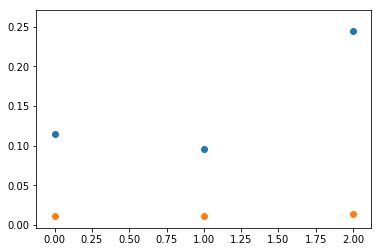

In [97]:
%matplotlib inline

plt.scatter(np.arange(len(minor_chars)), [char_vecs[c]['dist_f-c'] for c in minor_chars])
plt.scatter(np.arange(len(minor_chars)), [char_vecs[c]['dist_lc10_context_f-c'] for c in minor_chars])
plt.show()

# Do TSNE and plot character vectors

In [101]:
selected5_chars = ['harry', 'hermione', 'ron', 'draco', 'ginny']

## Reduce dimensions

In [109]:
all_char_vecs = []
char_labels = []

# Fanfic
for c in selected5_chars:
    all_char_vecs.extend(char_vecs_per_fic[c][10])
    char_labels.extend([f'{c}_fanfic'] * len(char_vecs_per_fic[c][10]))
    
# Canon
for c in selected5_chars:
    all_char_vecs.extend(char_vecs_per_canon[c][10])
    char_labels.extend([f'{c}_canon'] * len(char_vecs_per_canon[c][10]))
    
print(len(all_char_vecs))
print(len(char_labels))

120093
120093


In [110]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
reduced = pca.fit_transform(all_char_vecs)

In [111]:
%%timeit
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_reduced = tsne.fit_transform(reduced)

KeyboardInterrupt: 

In [51]:
tsne_reduced[0]

array([ 8.629038, 11.026836], dtype=float32)

In [71]:
# Save TSNE
import numpy as np

# np.save('/usr0/home/mamille2/erebor/fanfiction-project/output/tsne_chars_lc25.npy', tsne_reduced)
np.save('/usr0/home/mamille2/erebor/fanfiction-project/output/tsne_chars_lc10_context.npy', tsne_reduced)
np.save('/usr0/home/mamille2/erebor/fanfiction-project/output/tsne_chars_lc10_context_labels.npy', char_labels)

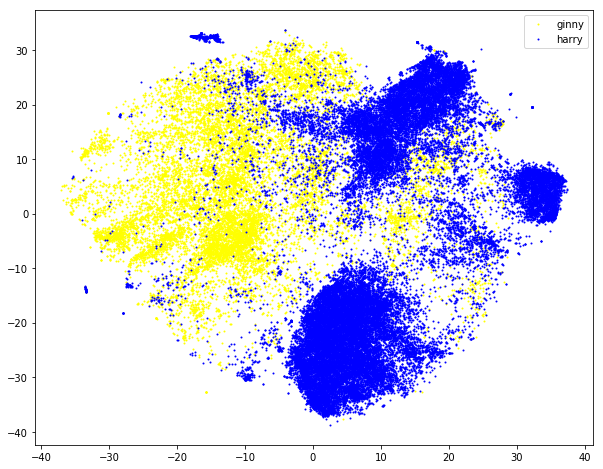

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.debugger import set_trace

chars2i = {c: i for i,c in enumerate(chars)}
cdict = {'draco': 'red', 'hermione': 'green', 'harry': 'blue', 'ginny': 'yellow', 'ron': 'purple'}
# selected_chars = ['harry', 'draco', 'ginny']
# selected_chars = ['harry', 'hermione', 'ron']
# selected_chars = ['hermione', 'ron', 'draco']
# selected_chars = ['hermione', 'ron']
# selected_chars = ['hermione', 'draco']
# selected_chars = ['harry', 'draco']
selected_chars = ['ginny', 'harry']


fig, ax = plt.subplots(figsize=(10,8))
# for c in np.unique(char_labels):
for c in selected_chars:
    ix = np.where(np.array(char_labels) == c)
#     plt.scatter(tsne_reduced[:,0][ix], tsne_reduced[:,1][ix], c=[chars2i[c] for c in char_labels], s=1, label=char_labels)
#     plt.scatter(tsne_reduced[:,0][ix], tsne_reduced[:,1][ix], c=chars2i[c], s=1, label=c)
#     ax.scatter(tsne_reduced[:,0][ix], tsne_reduced[:,1][ix], c=chars2i[c], s=1, label=c)
    ax.scatter(tsne_reduced[:,0][ix], tsne_reduced[:,1][ix], c=cdict[c], s=1, label=c)
    
ax.legend()
plt.show()